In [3]:
from radd import build, theta, vis
import pandas as pd
from JSAnimation import IPython_display, HTMLWriter
from matplotlib import animation
from tempfile import NamedTemporaryFile
from IPython.display import HTML
import glob

from PIL import Image as PIL_Image
from images2gif import writeGif
from IPython.display import HTML


In [12]:
def anim_to_html(anim):      
      VIDEO_TAG = """<video controls>
             <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
             Your browser does not support the video tag.
            </video>"""

      if not hasattr(anim, '_encoded_video'):
            with NamedTemporaryFile(suffix='.mp4') as f:
                  anim.save(f.name, dpi=300, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
                  video = open(f.name, "rb").read()
            anim._encoded_video = video.encode("base64")
      return VIDEO_TAG.format(anim._encoded_video)


def display_animation(anim):
      plt.close(anim._fig)
      return HTML(anim_to_html(anim))

# Reactive

In [15]:
# read in dataframe from demo dir (10 example subjects)
redat=pd.read_csv('/Users/kyle/Dropbox/Git/radd/demo/reactive_example_idx.csv')
# baseline (bsl) and caution (pnl) conditions in 'Cond' column
redat.head()

idx  GoTrial  StopSignal Cond ttype choice  response  acc      rt   ssd
0   28        1        1000  bsl    go     go         1    1  0.5985  1000
1   28        1        1000  bsl    go     go         1    1  0.5202  1000
2   28        1        1000  bsl    go     go         1    1  0.5451  1000
3   28        1        1000  bsl    go     go         1    1  0.5716  1000
4   28        1        1000  bsl    go     go         1    1  0.5052  1000

In [30]:
x = redata[redata['ssd'].isin([300, 400])]

In [31]:
# initiate dependent process model with dynamic gain (kind = 'xdpm')
# allowing execution drift to vary b/w Baseline and Caution conditions
# (simply kind='dpm' for model with no dynamic gain signal)
m = build.Model(kind='xdpm', data=x, weighted=False, depends_on={'v':'Cond'})

### Animation of Dependent Process Model (DPM)

In [32]:
bound=theta.all_params_to_scalar(m.inits)['a']
params=deepcopy(m.inits)
m.make_simulator()
#!mkdir animation_frames


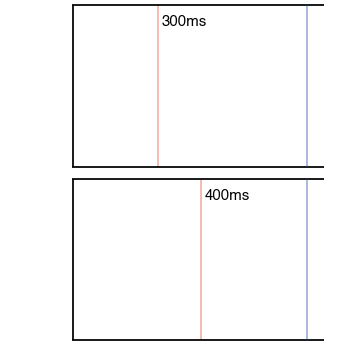
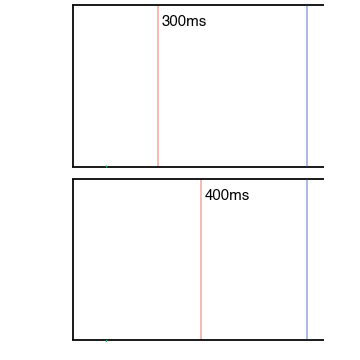
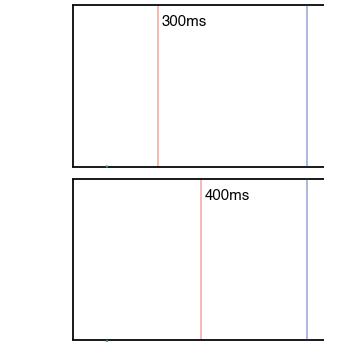
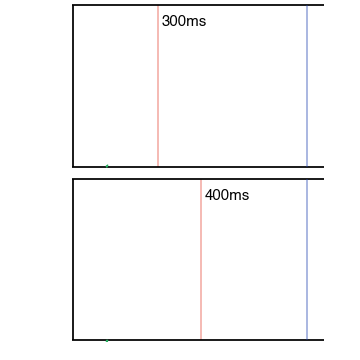
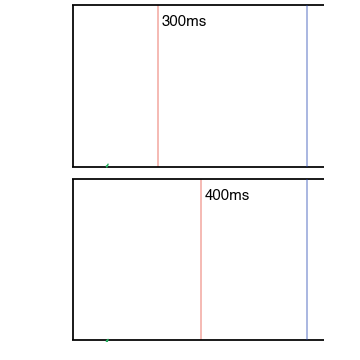
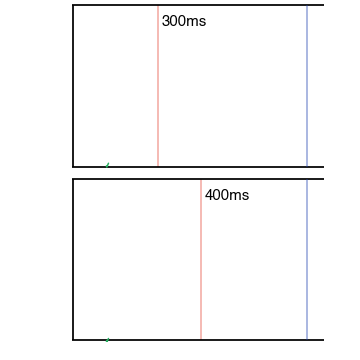
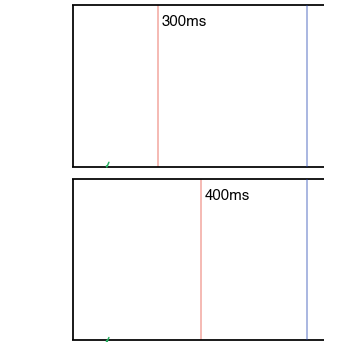
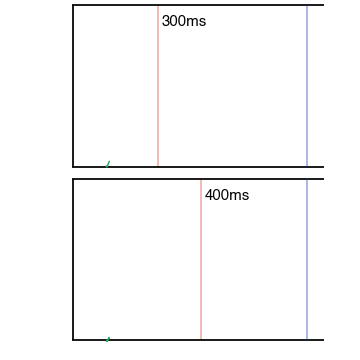
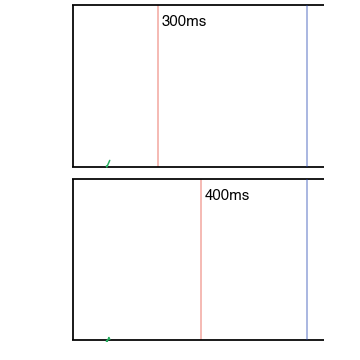
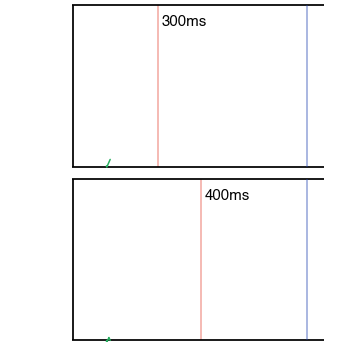
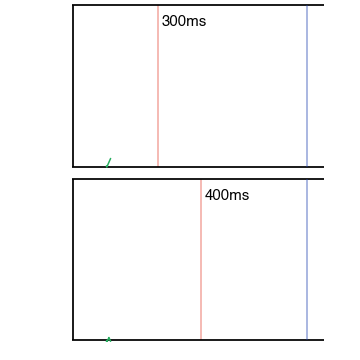
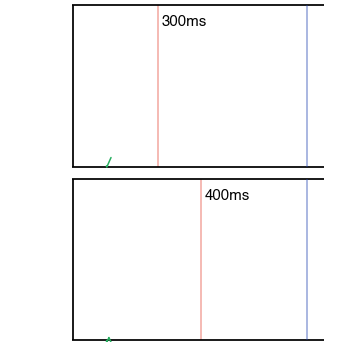
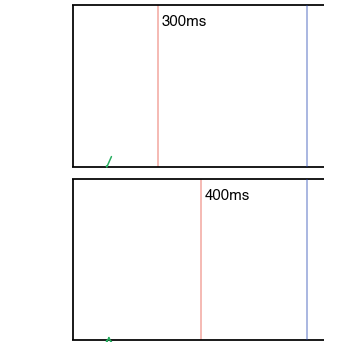
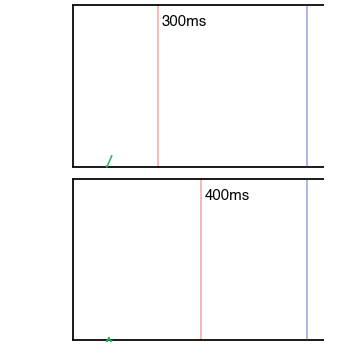
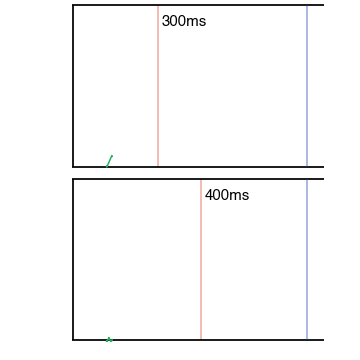
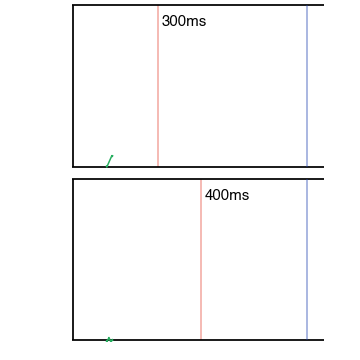
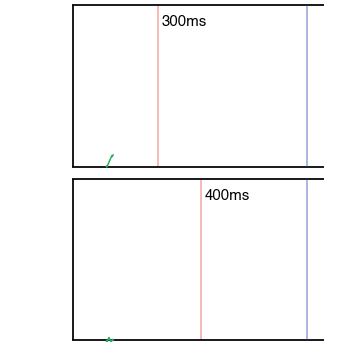
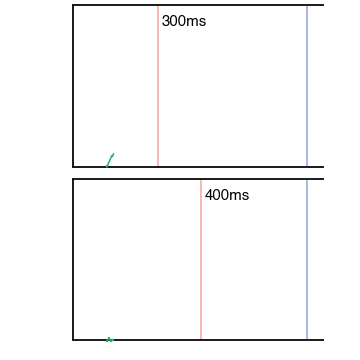
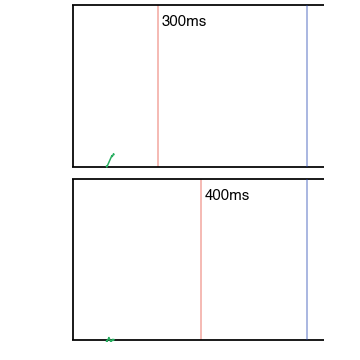
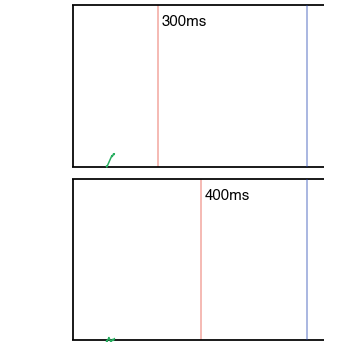
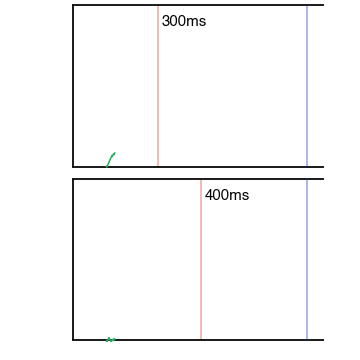
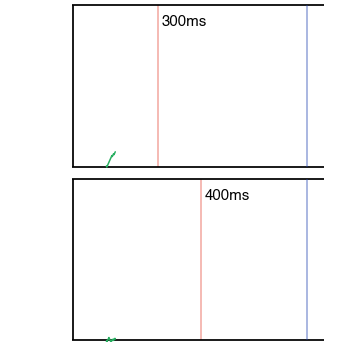
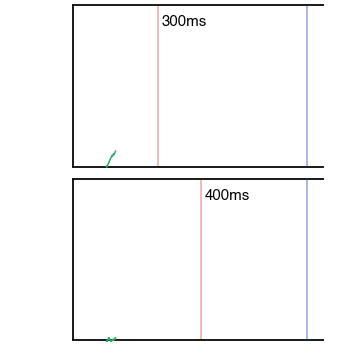
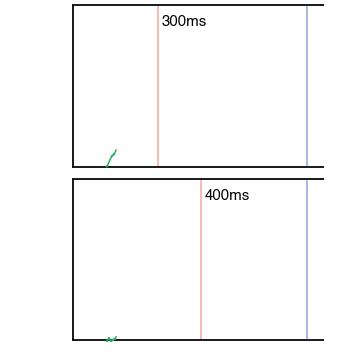
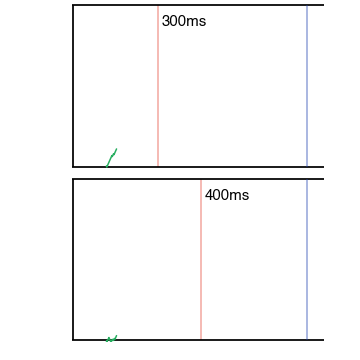
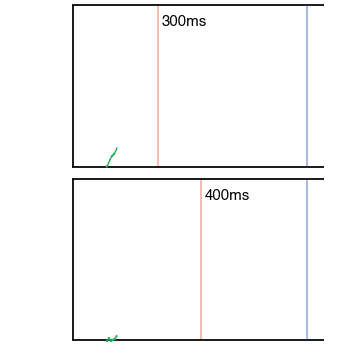
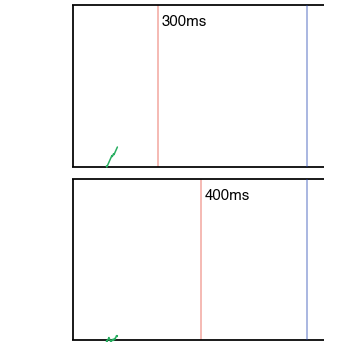
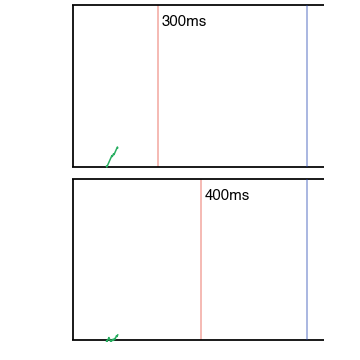
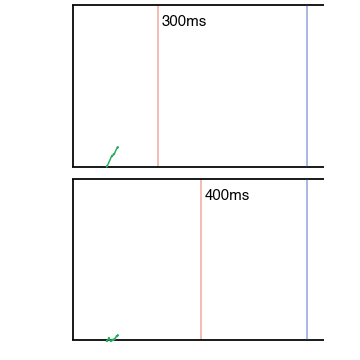
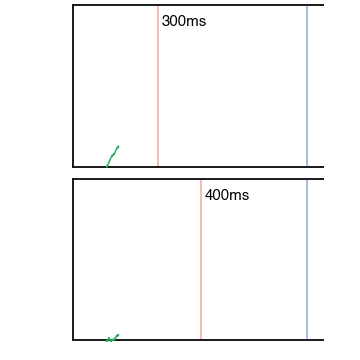
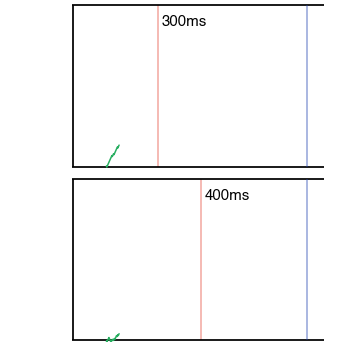
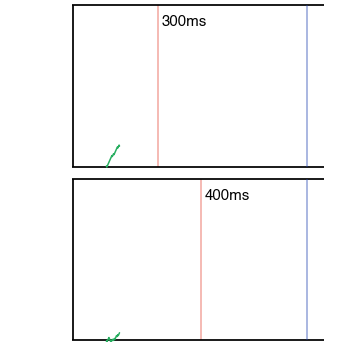
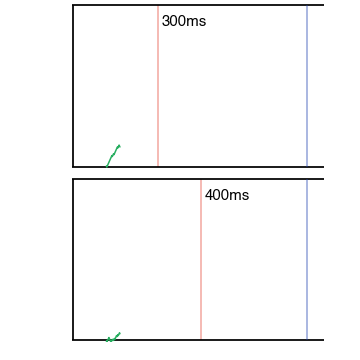
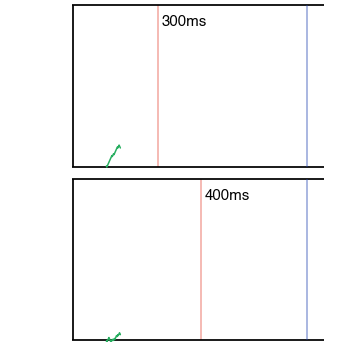
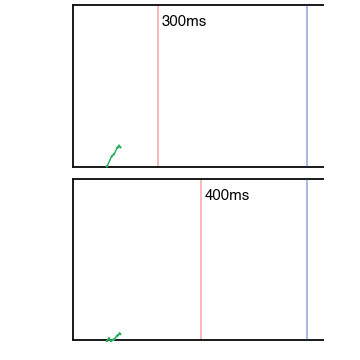
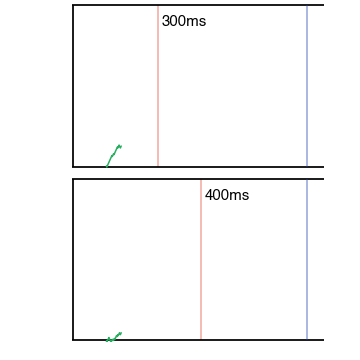
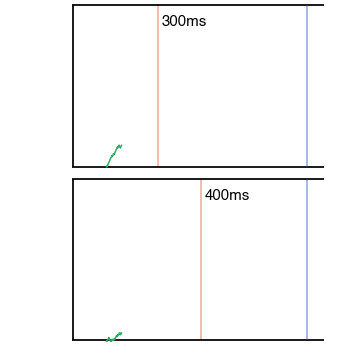
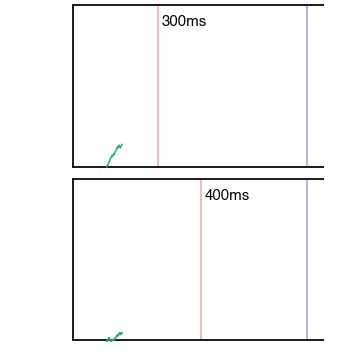
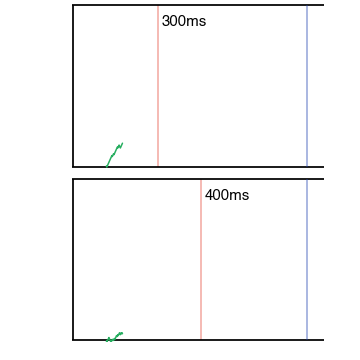
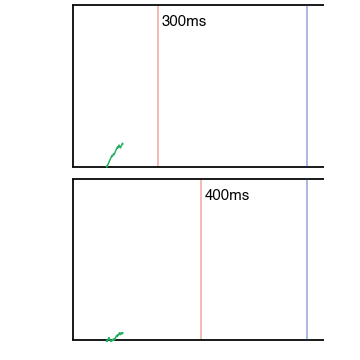
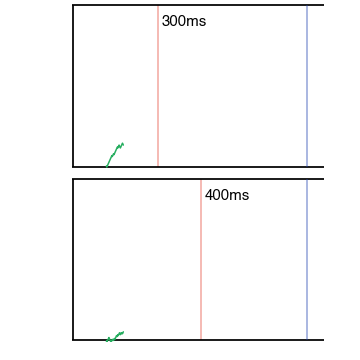
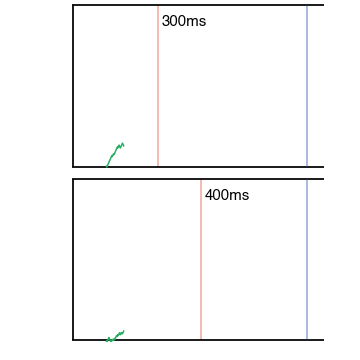
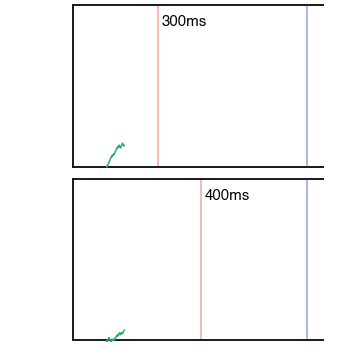
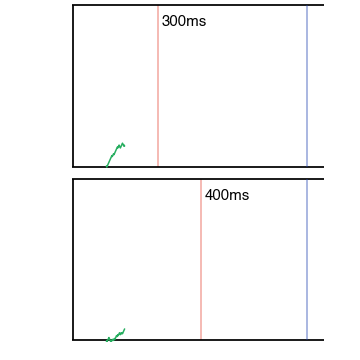
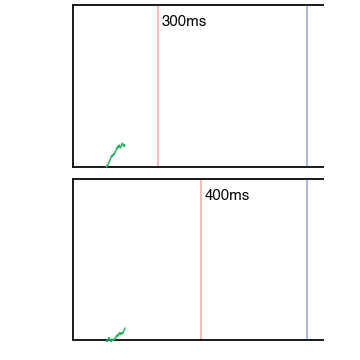
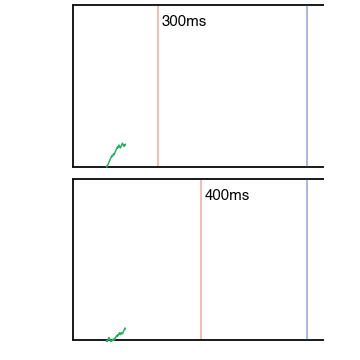
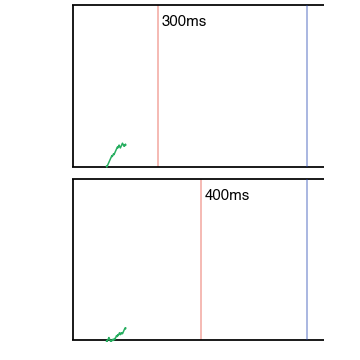
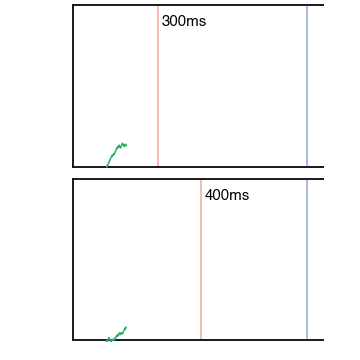
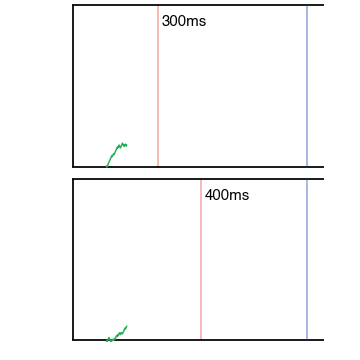
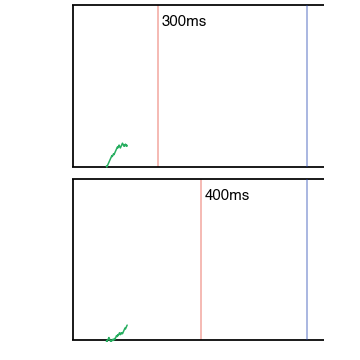
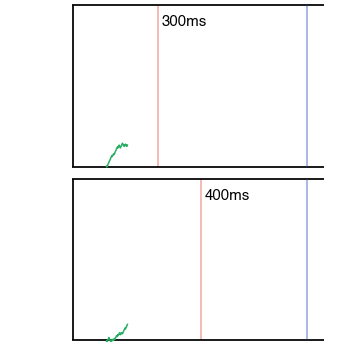
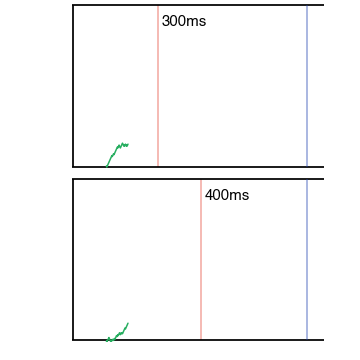
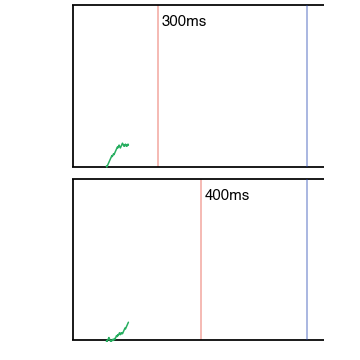
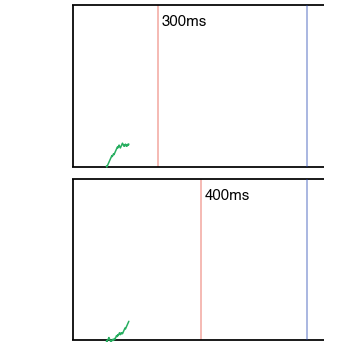
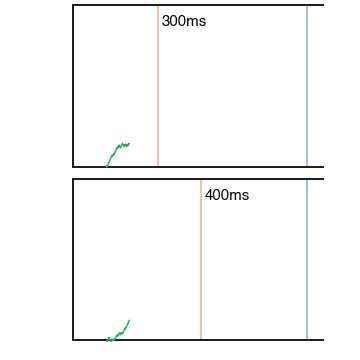
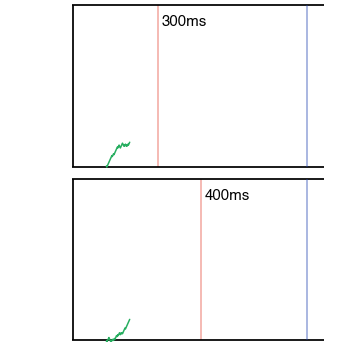
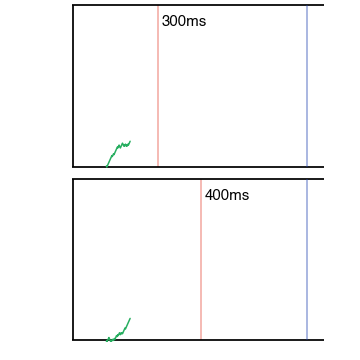
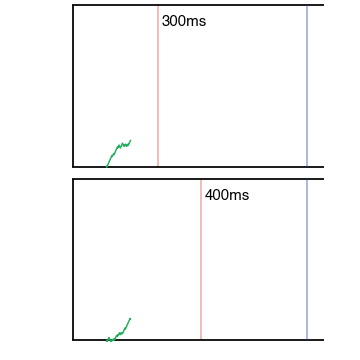
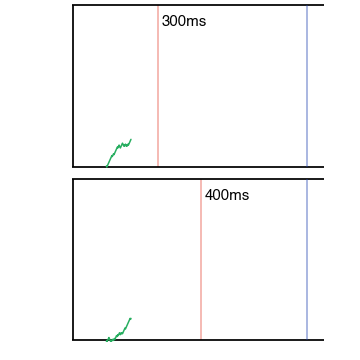
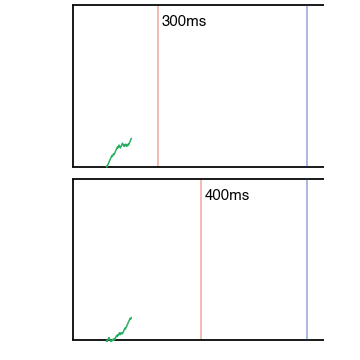
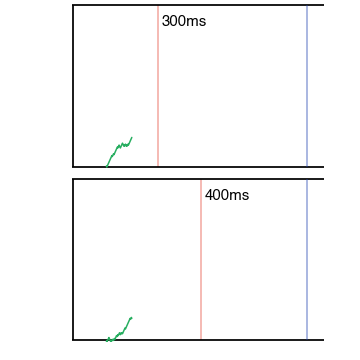
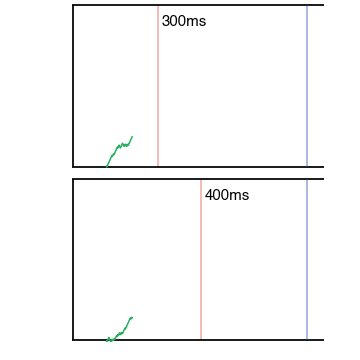
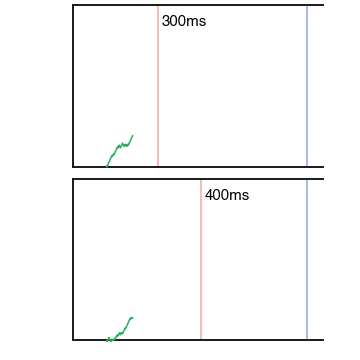
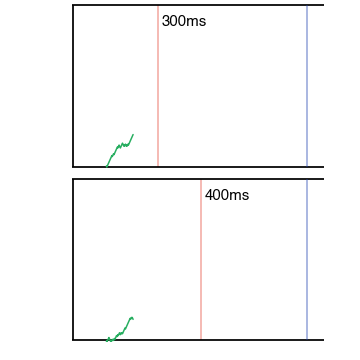
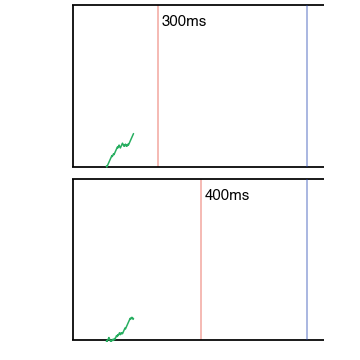
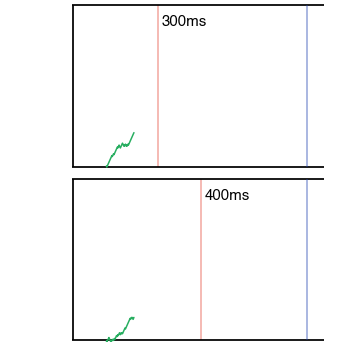
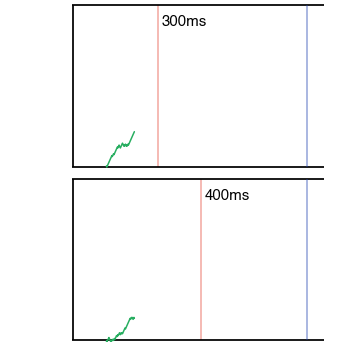
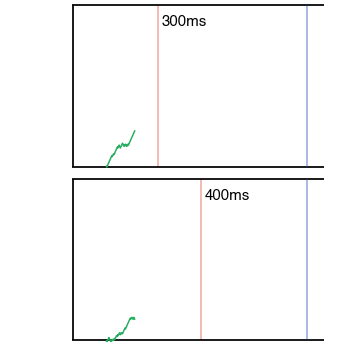
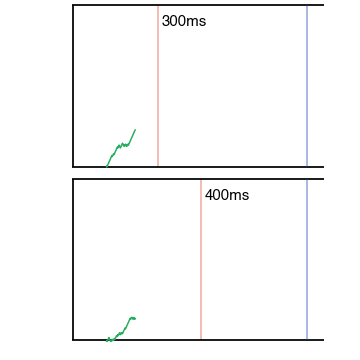
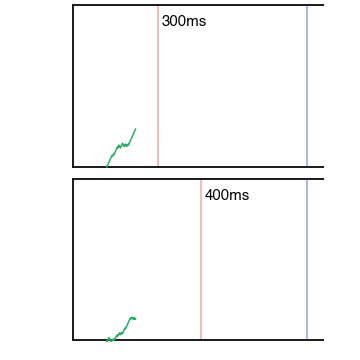
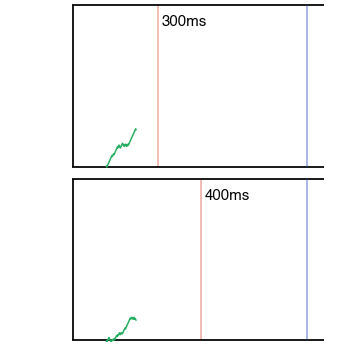
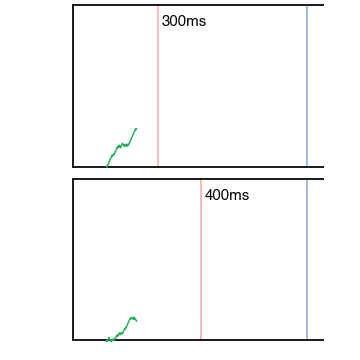
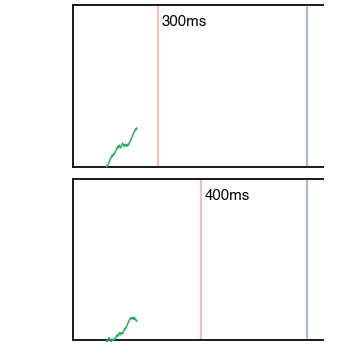
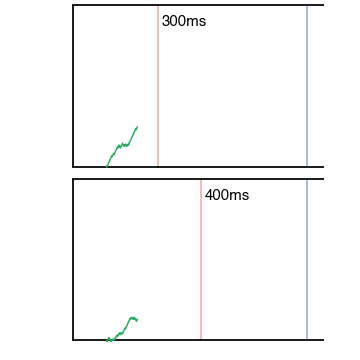
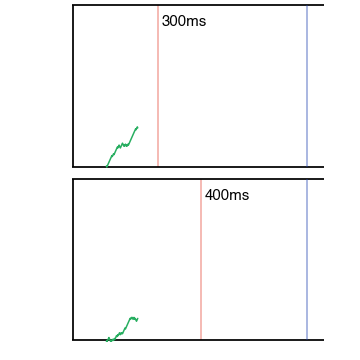
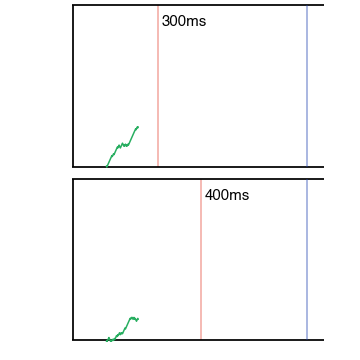
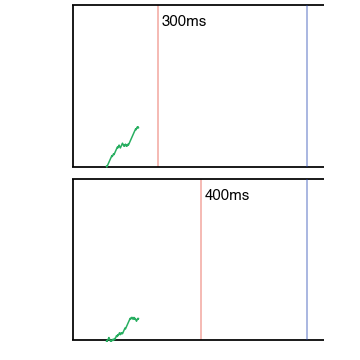
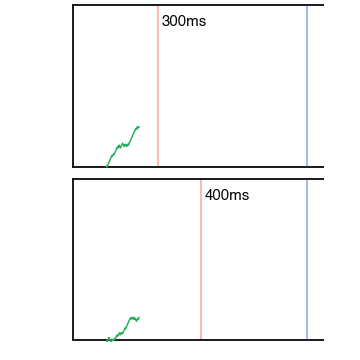
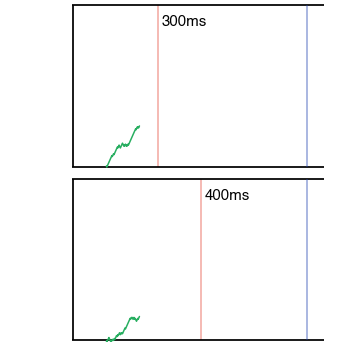
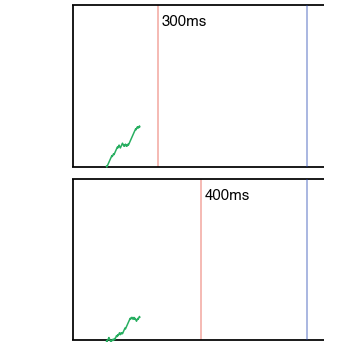
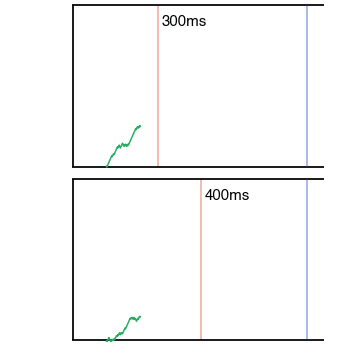
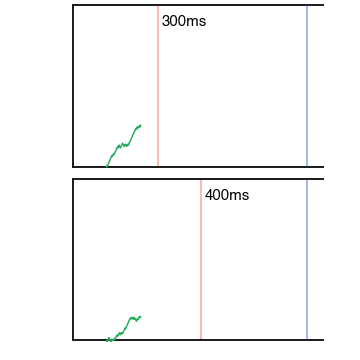
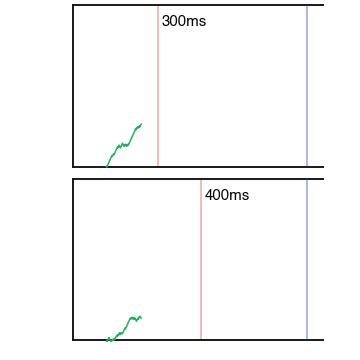
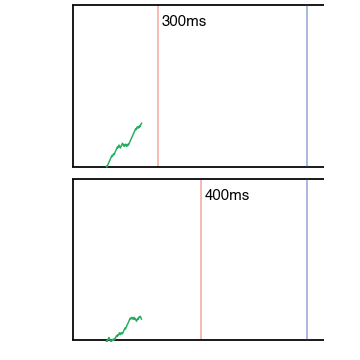
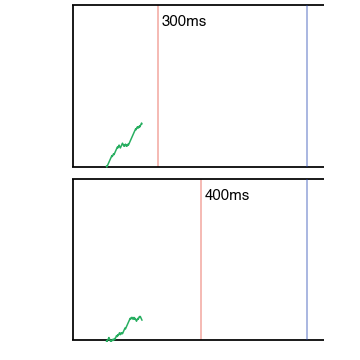
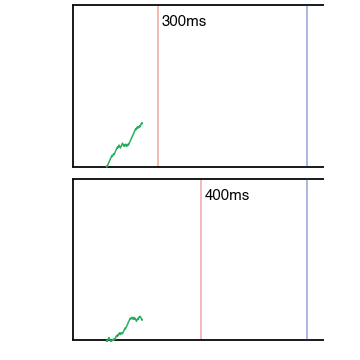
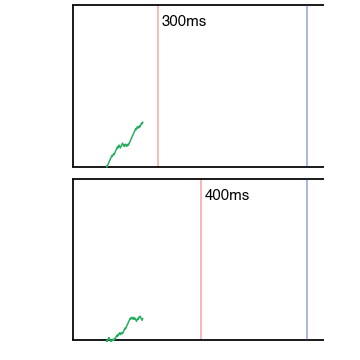
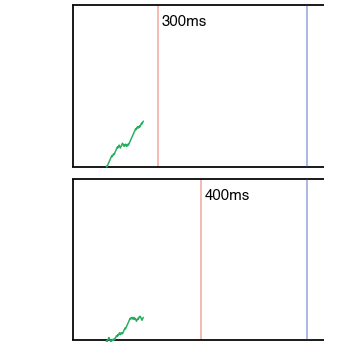
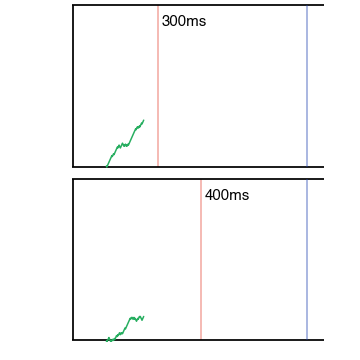
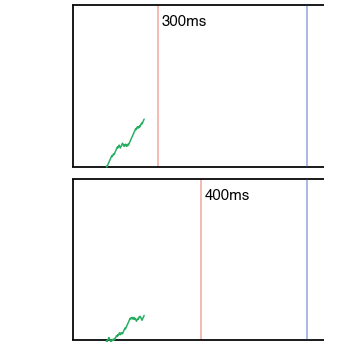
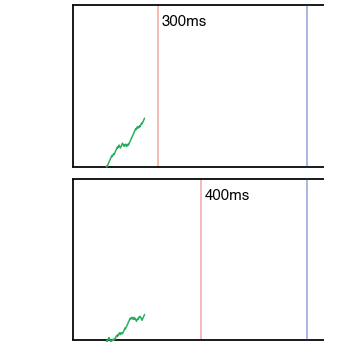
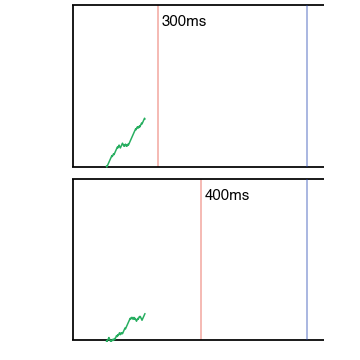
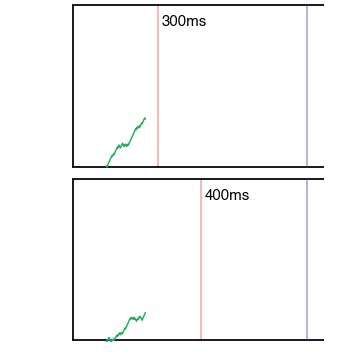
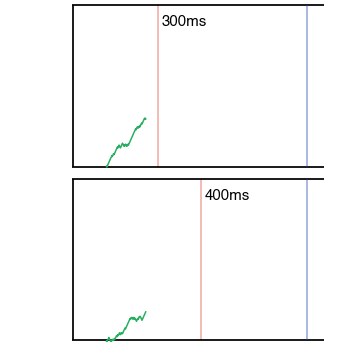
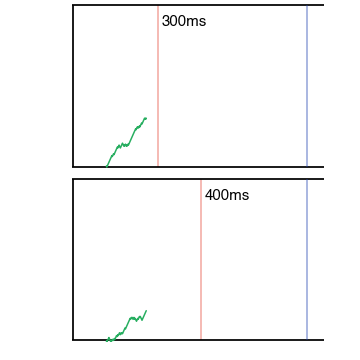
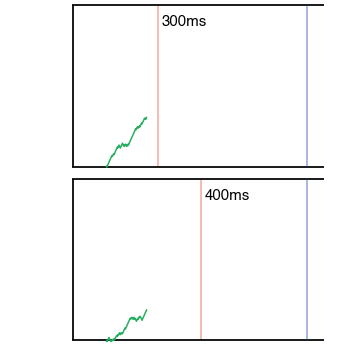
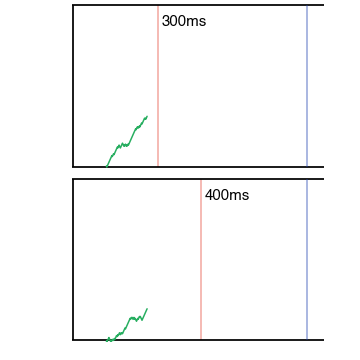
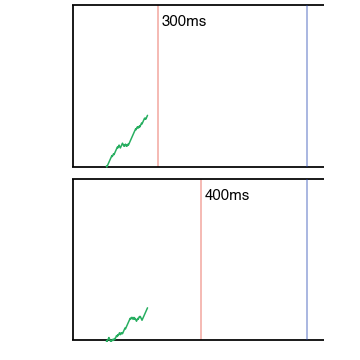
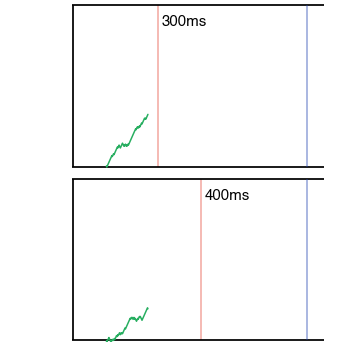
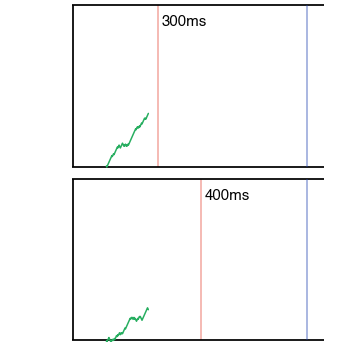
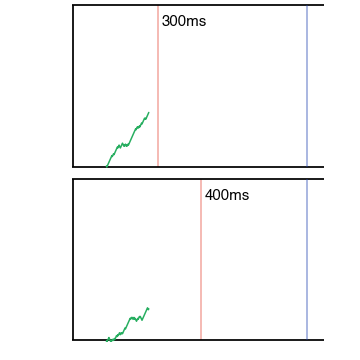
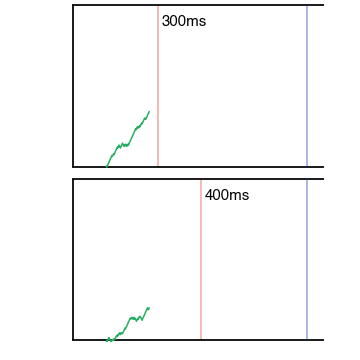
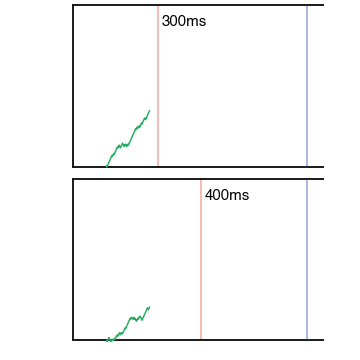
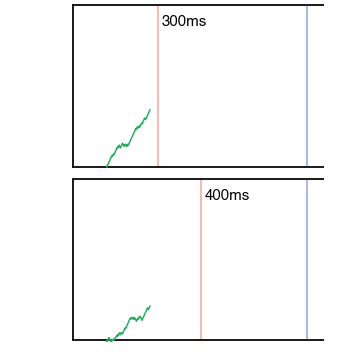
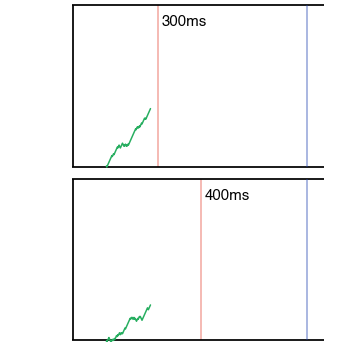
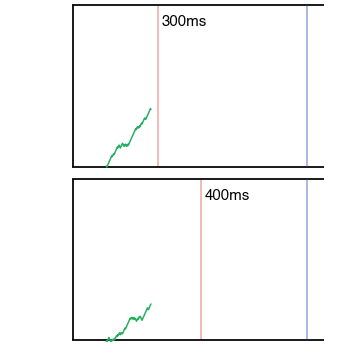
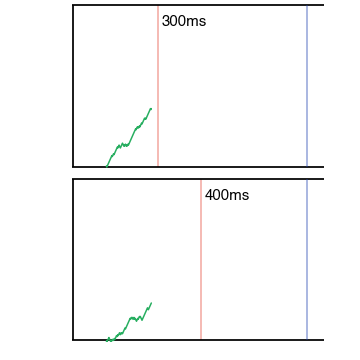
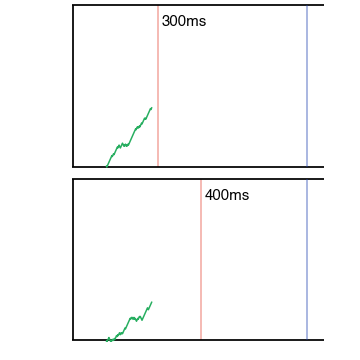
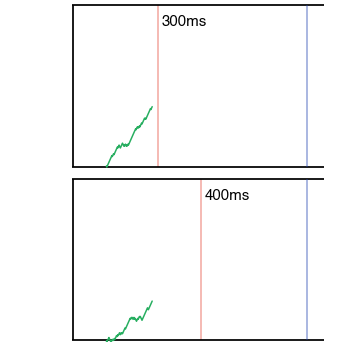
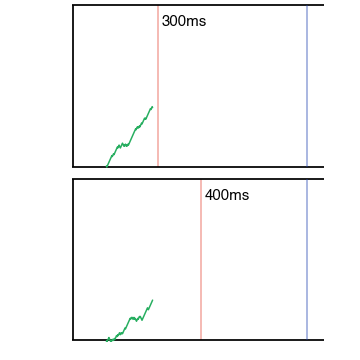
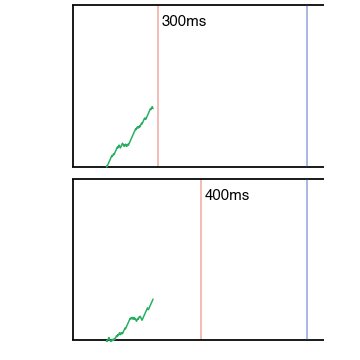
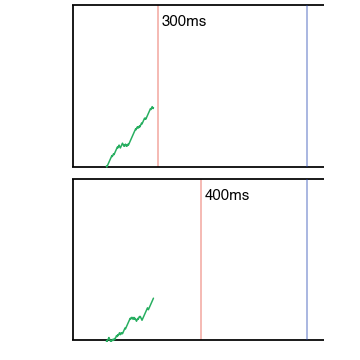
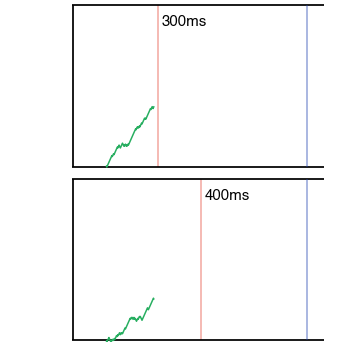
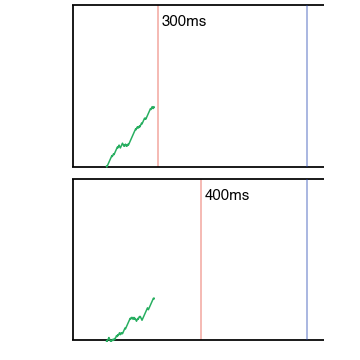
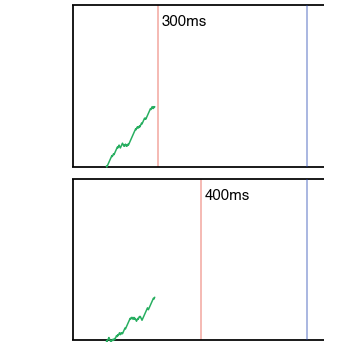
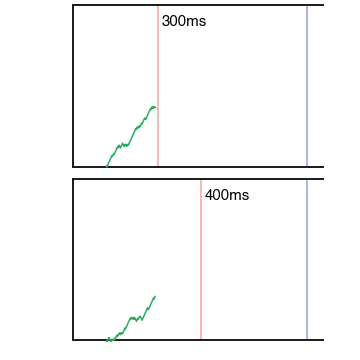
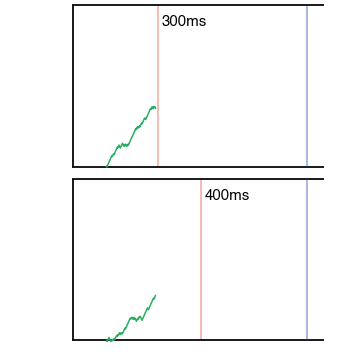
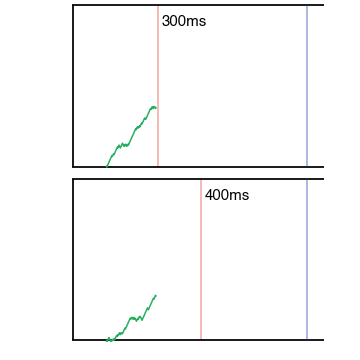
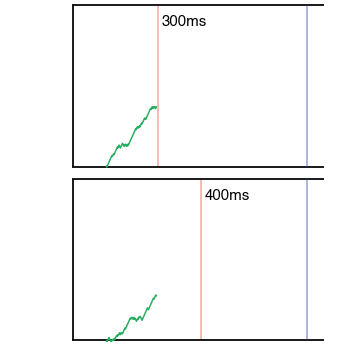
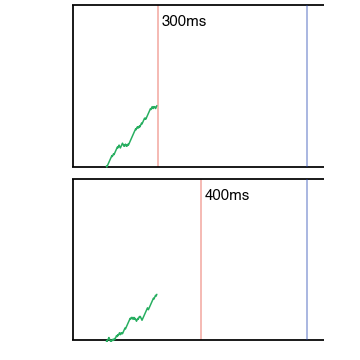
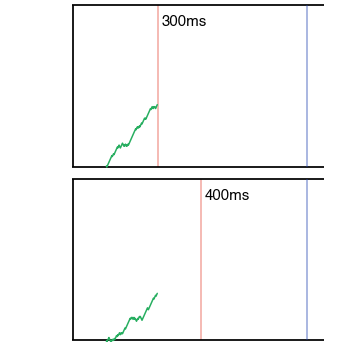
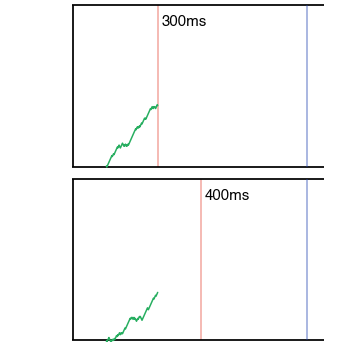
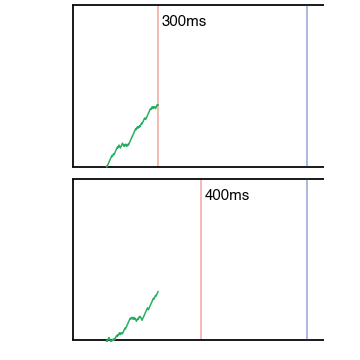
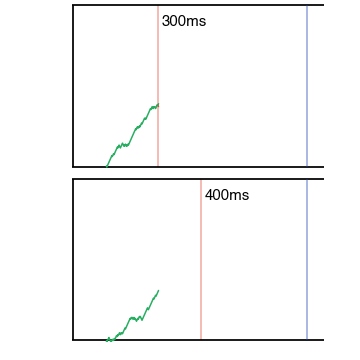
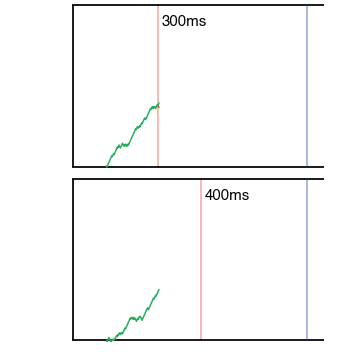
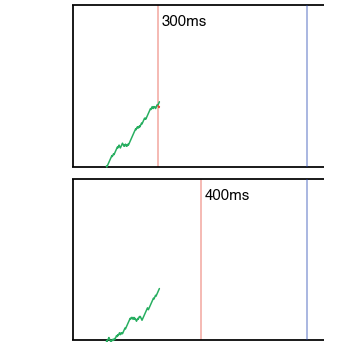
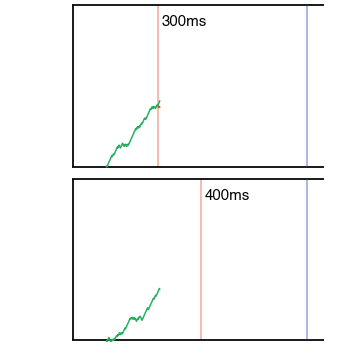
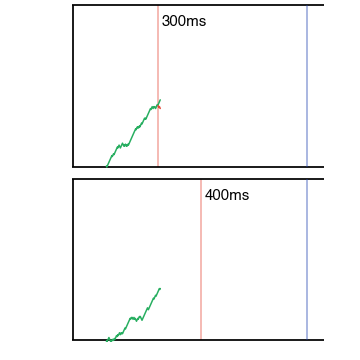
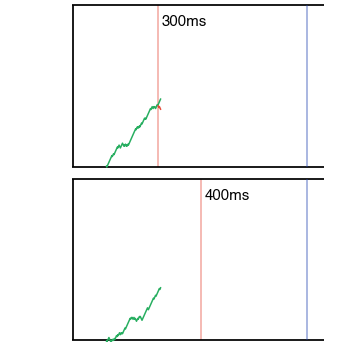
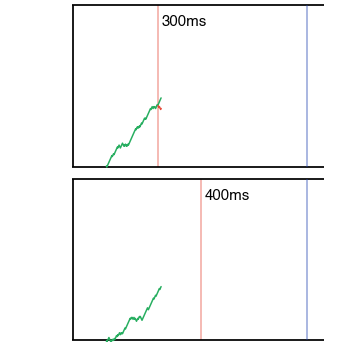
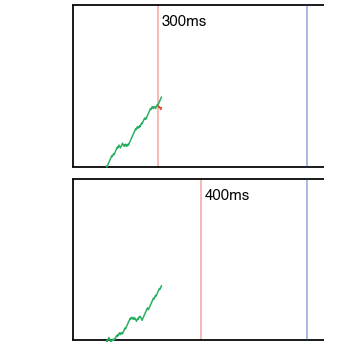
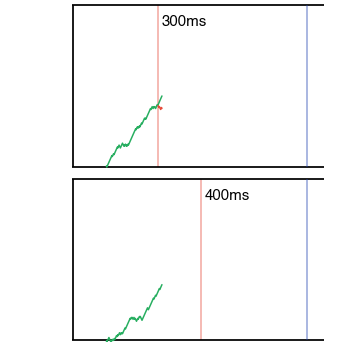
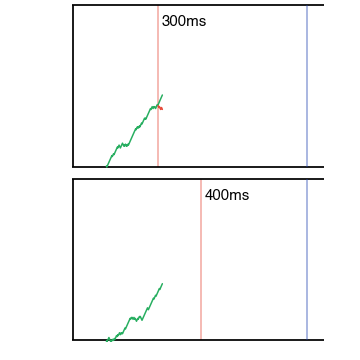
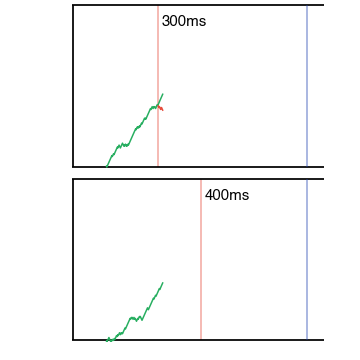
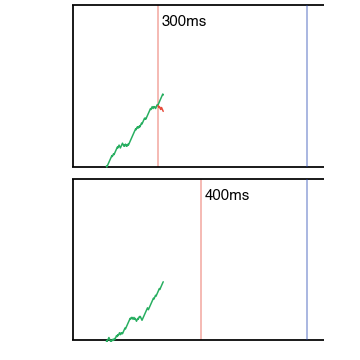
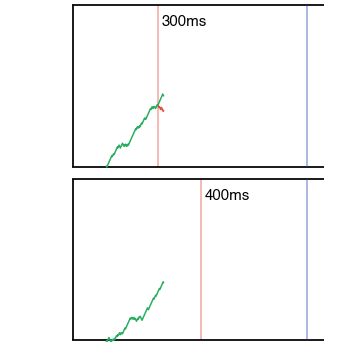
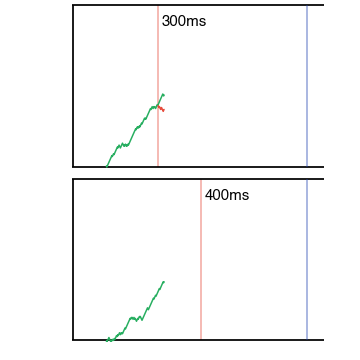
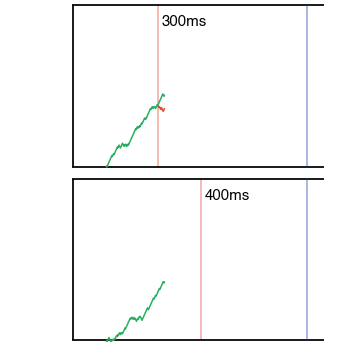
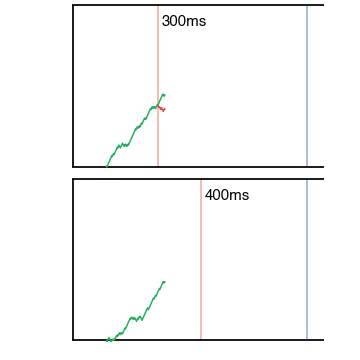
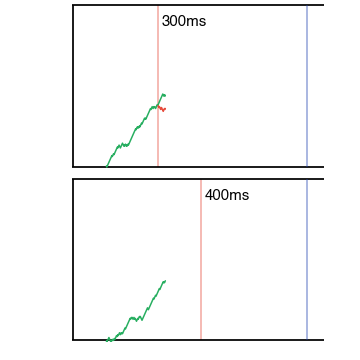
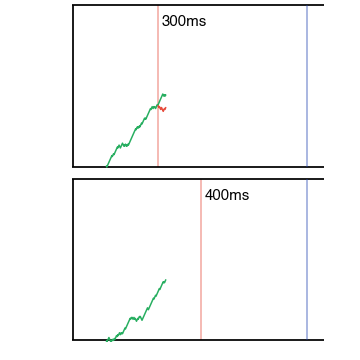
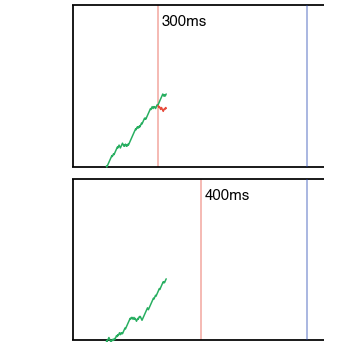
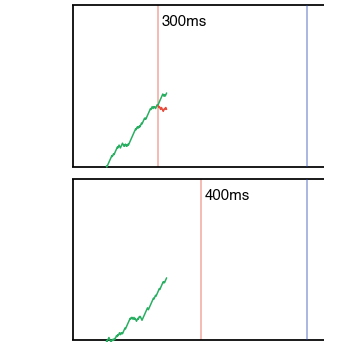
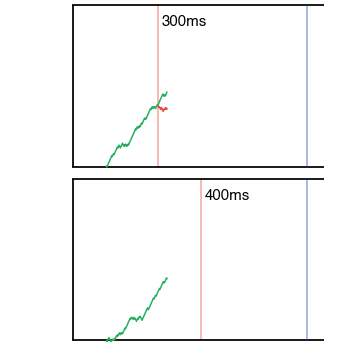
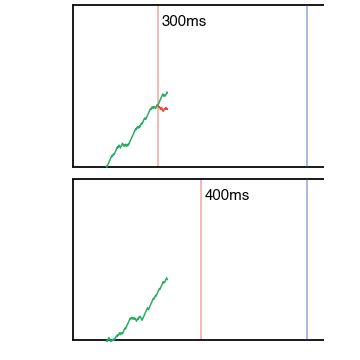
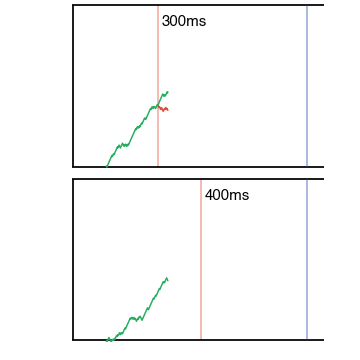
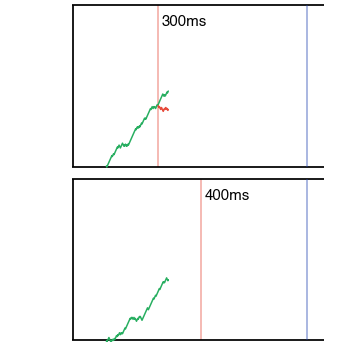
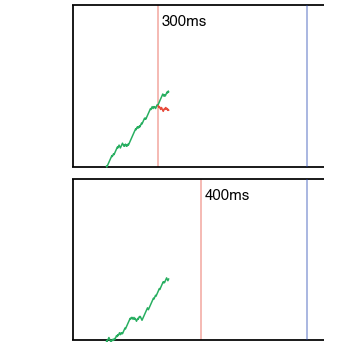
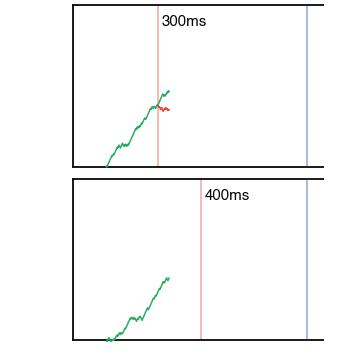
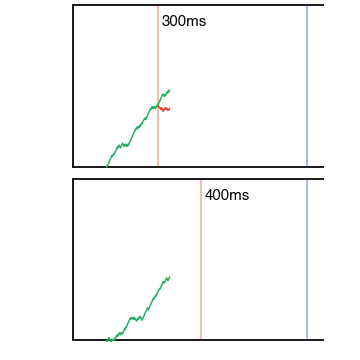
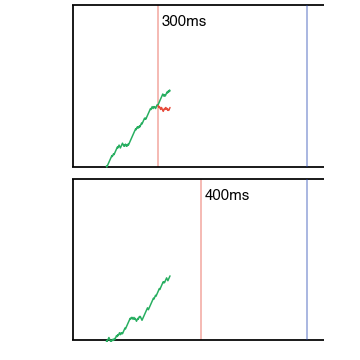
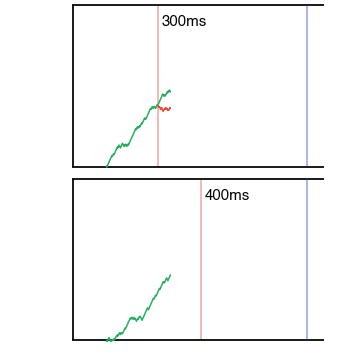
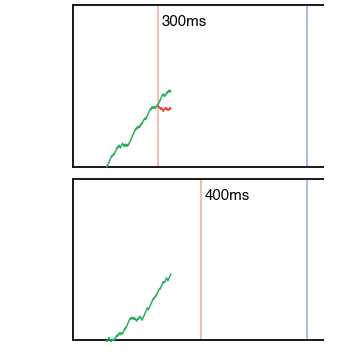
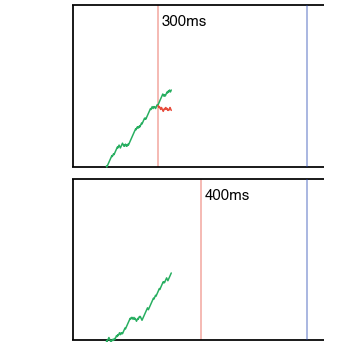
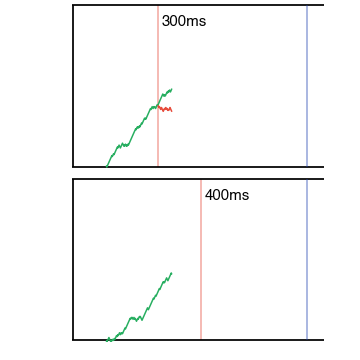
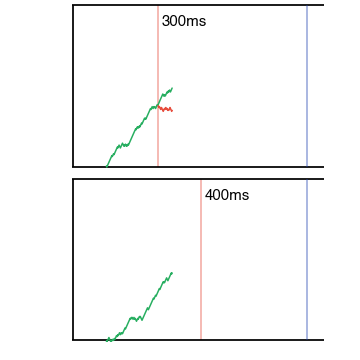
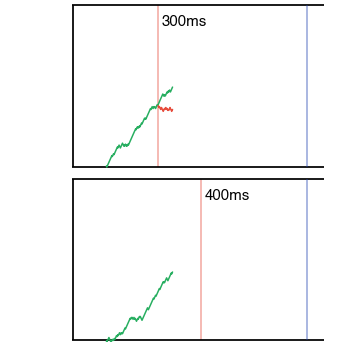
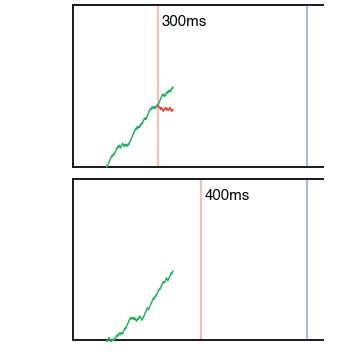
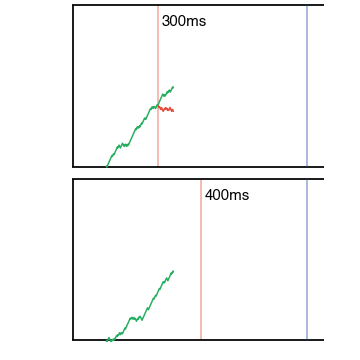
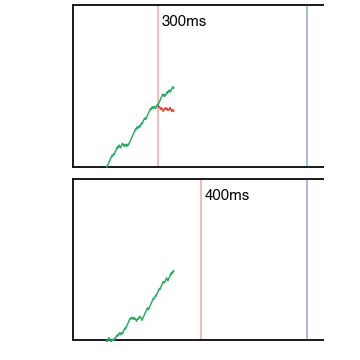
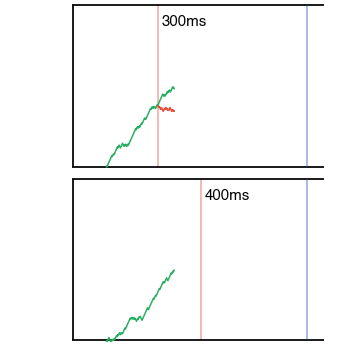
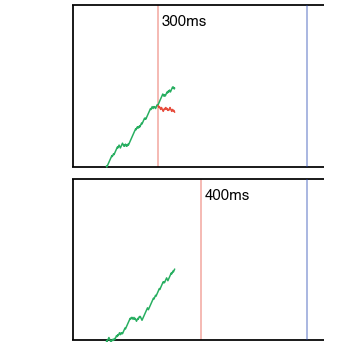
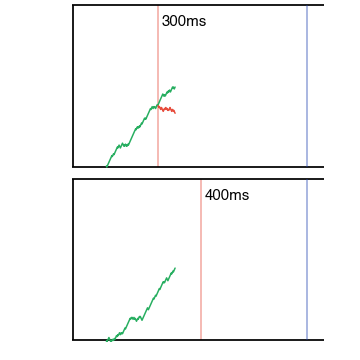
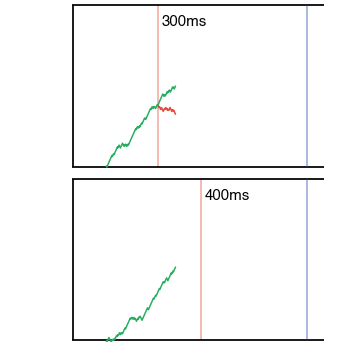
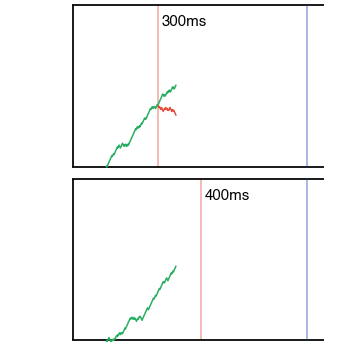
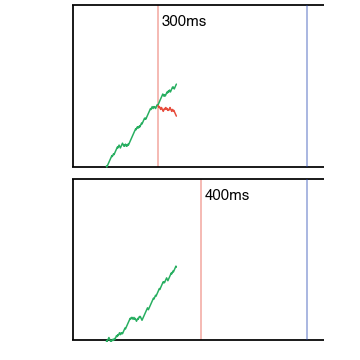
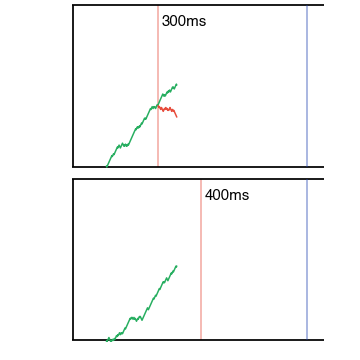
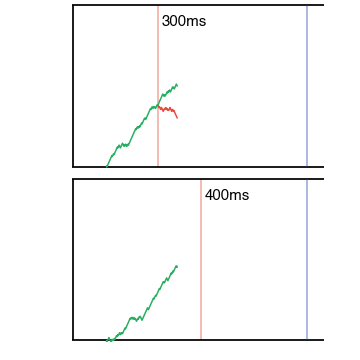
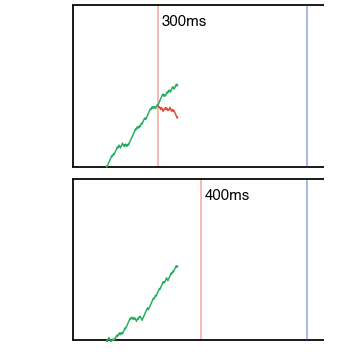
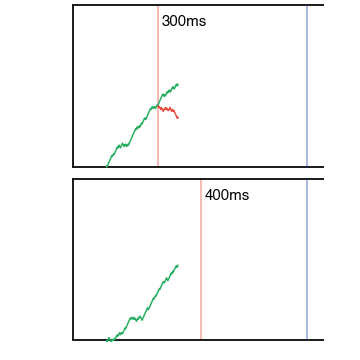
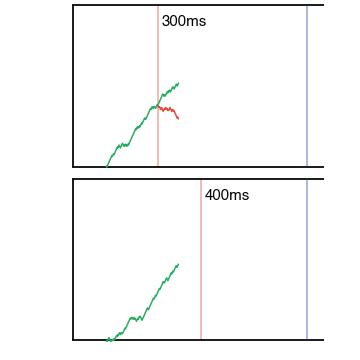
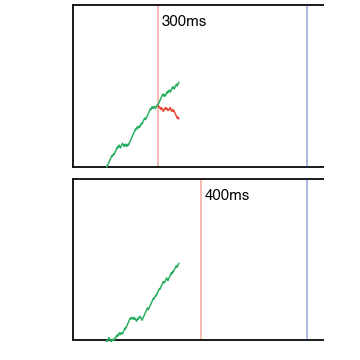
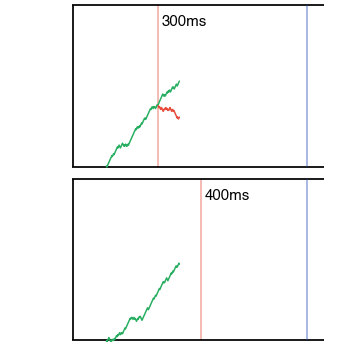
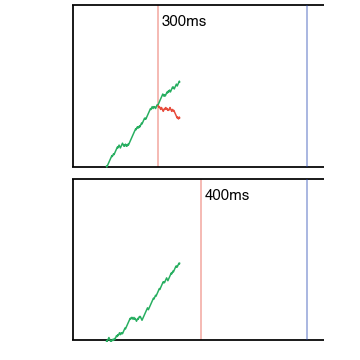
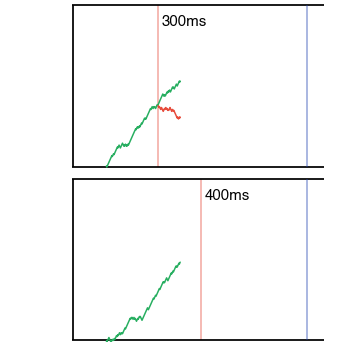
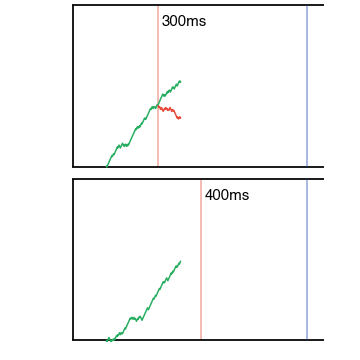
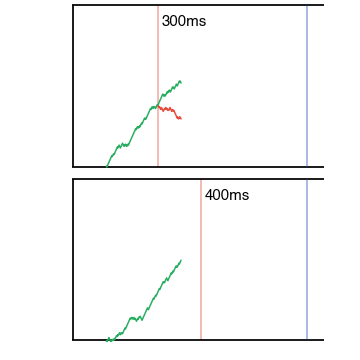
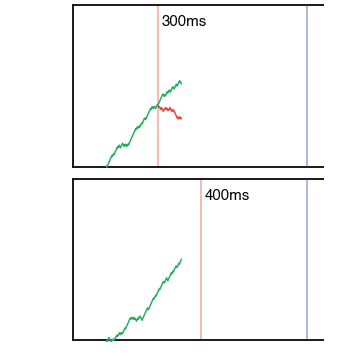
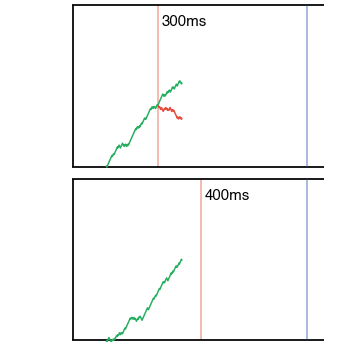
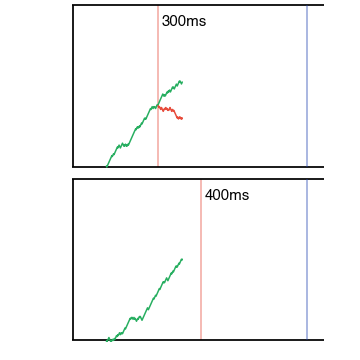
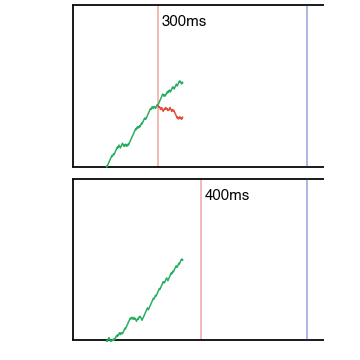
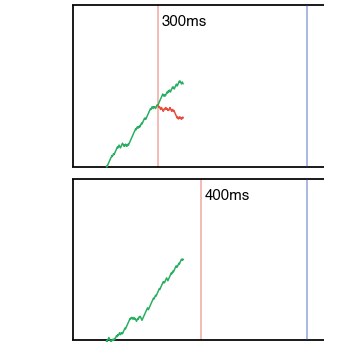
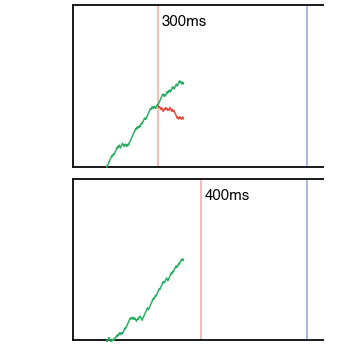
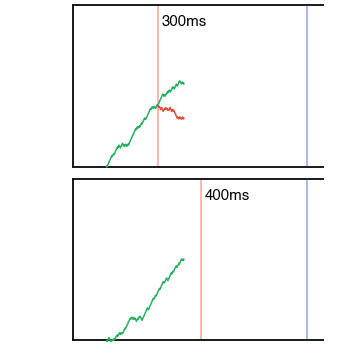
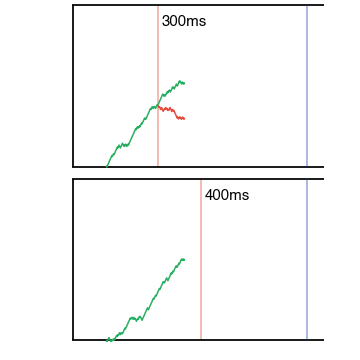
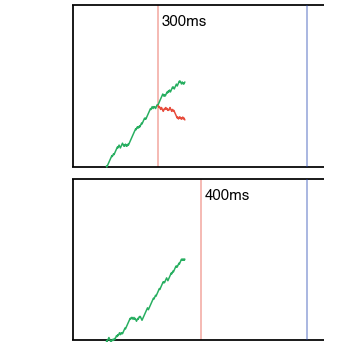
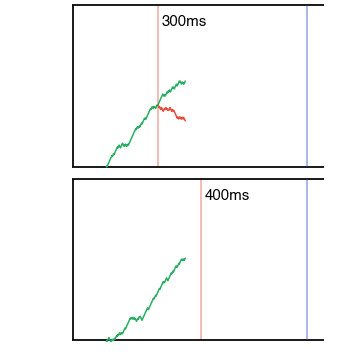
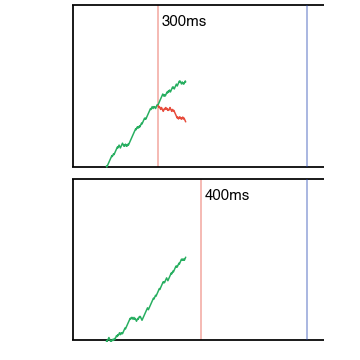
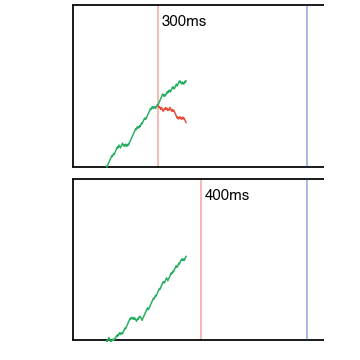
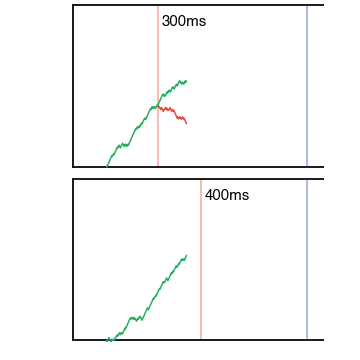
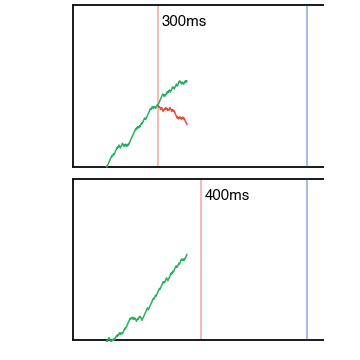
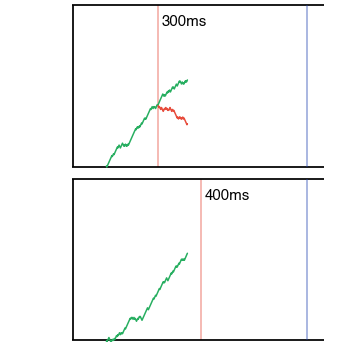
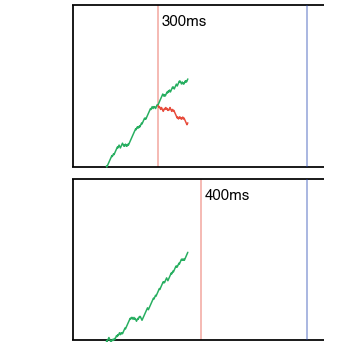
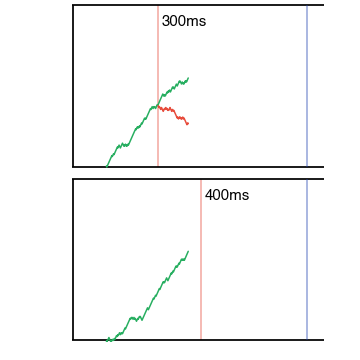
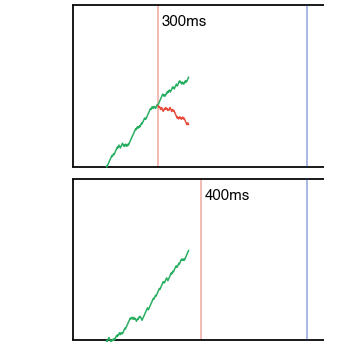
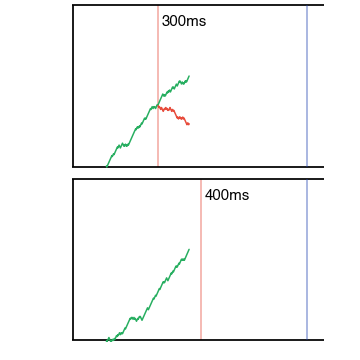
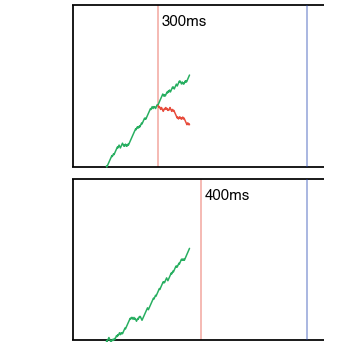
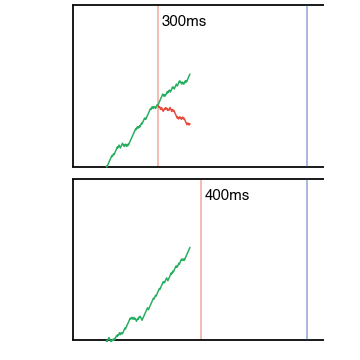
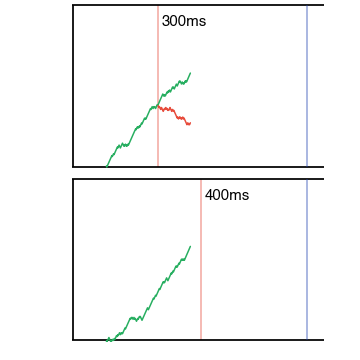
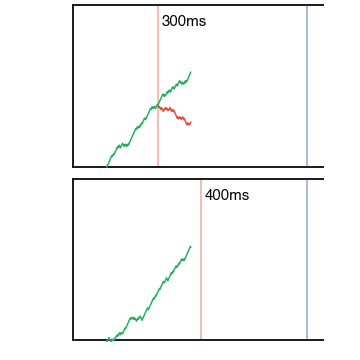
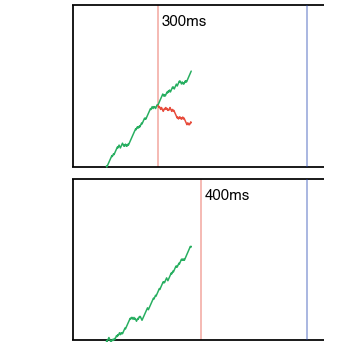
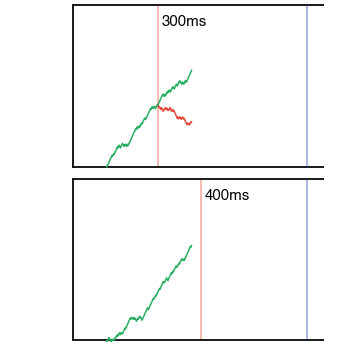
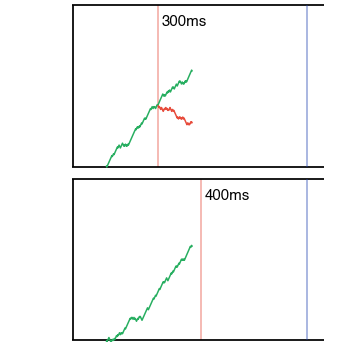
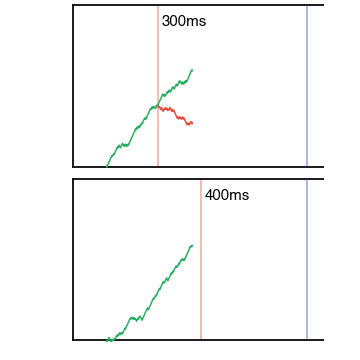
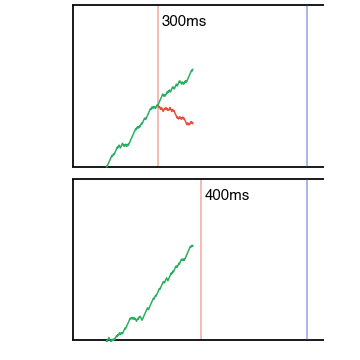
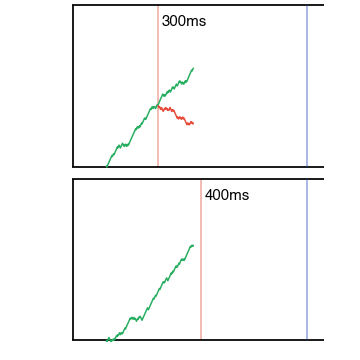
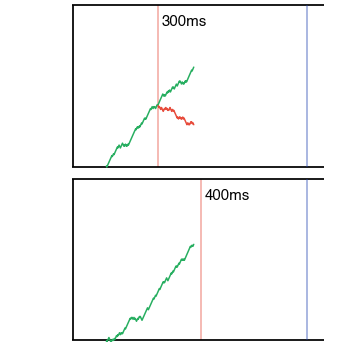
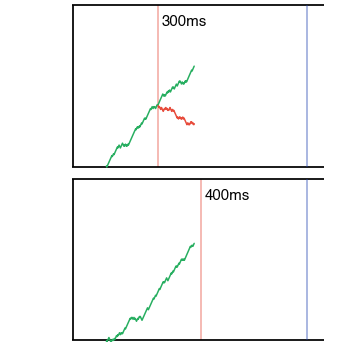
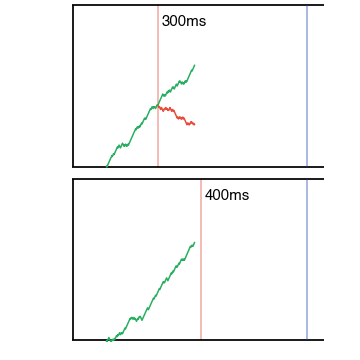
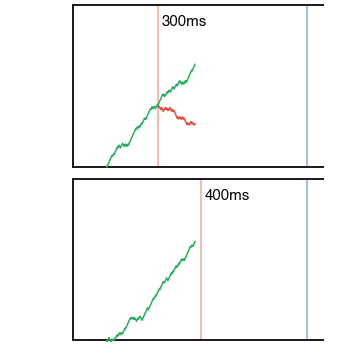
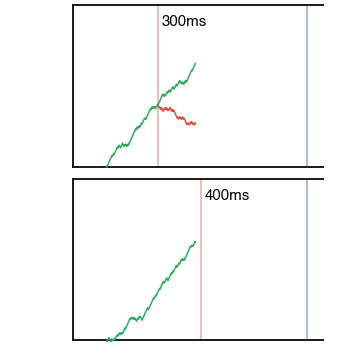
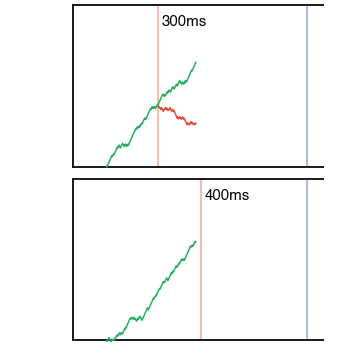
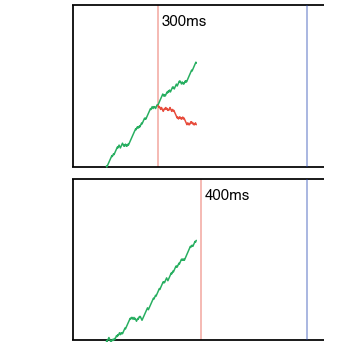
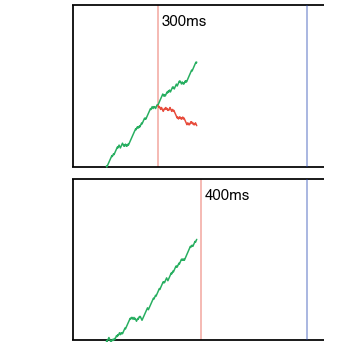
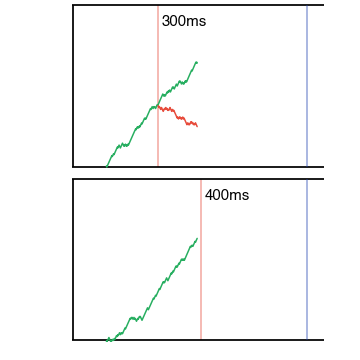
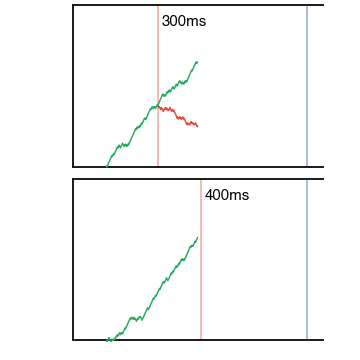
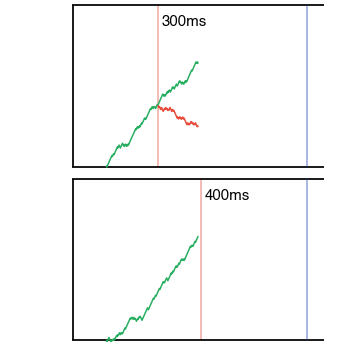
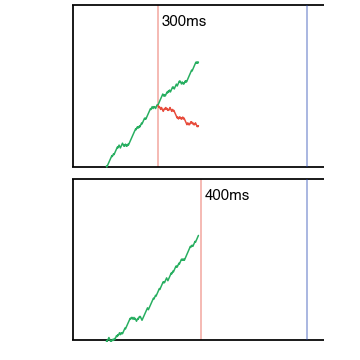
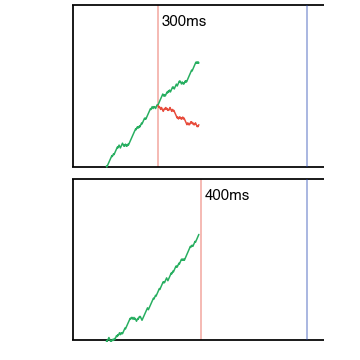
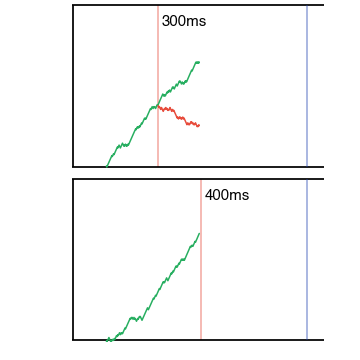
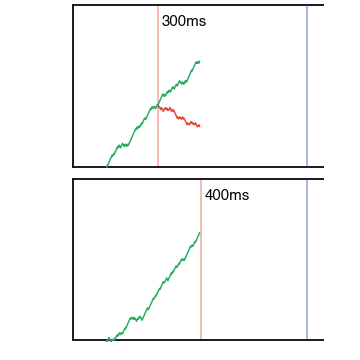
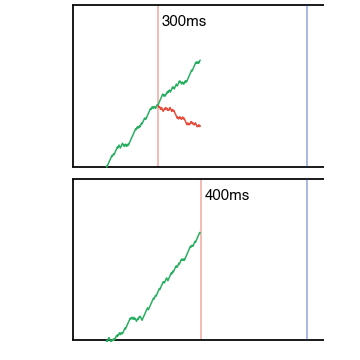
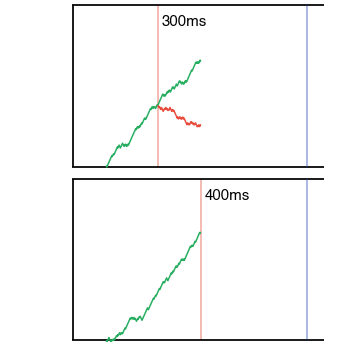
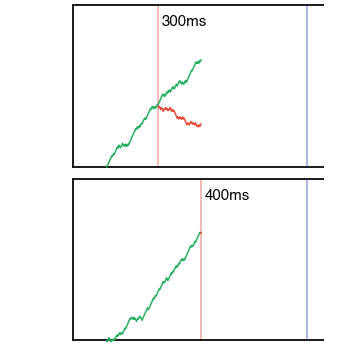
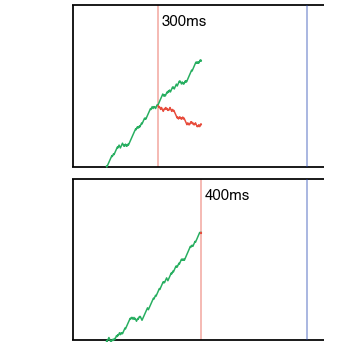
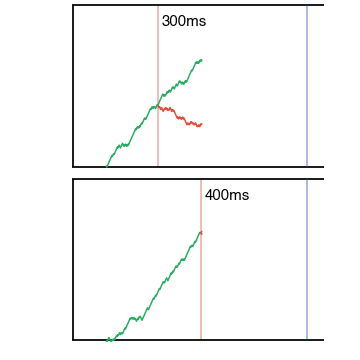
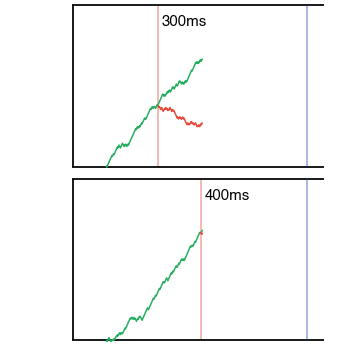
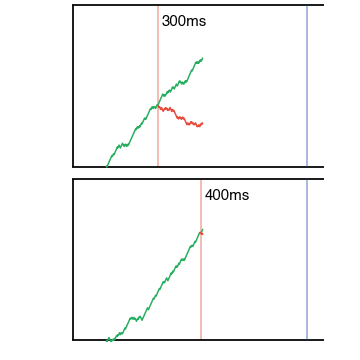
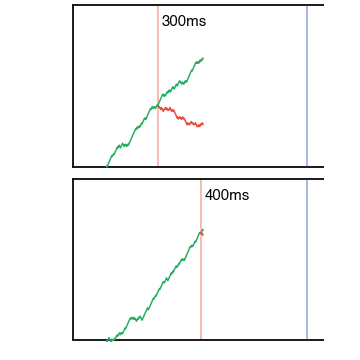
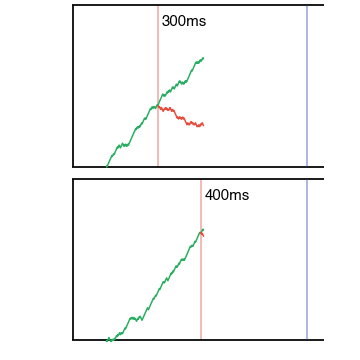
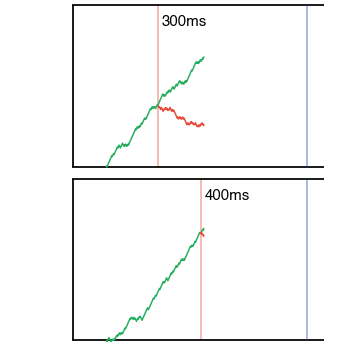
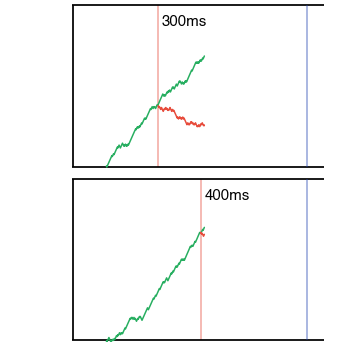
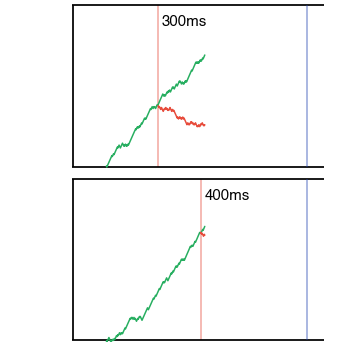
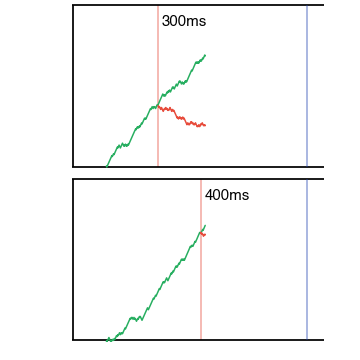
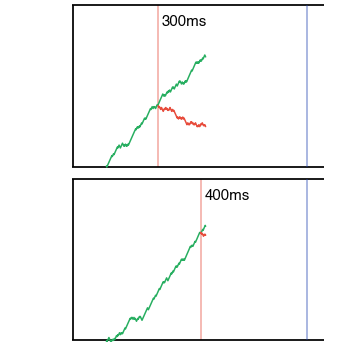
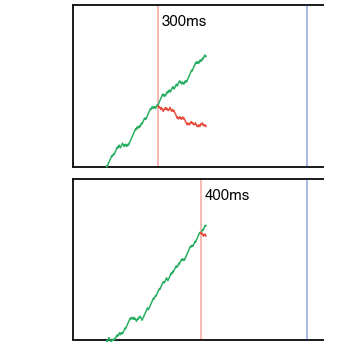
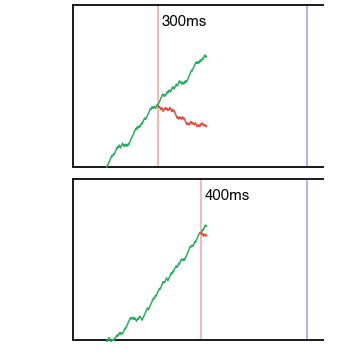
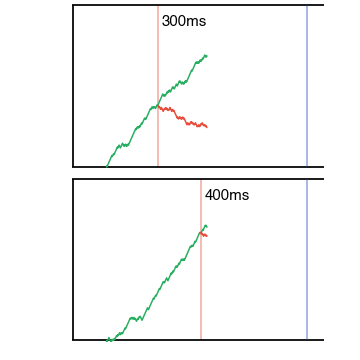
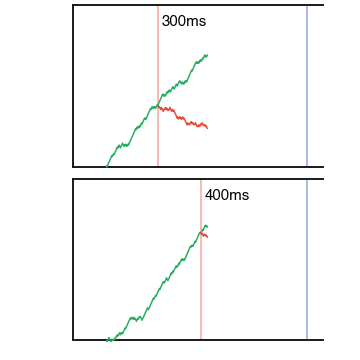
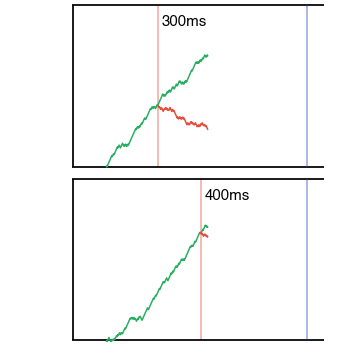
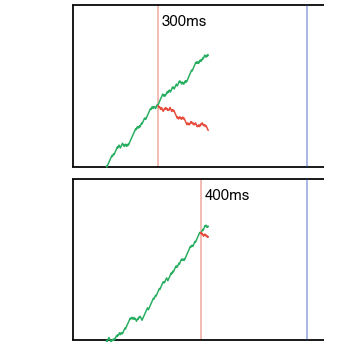
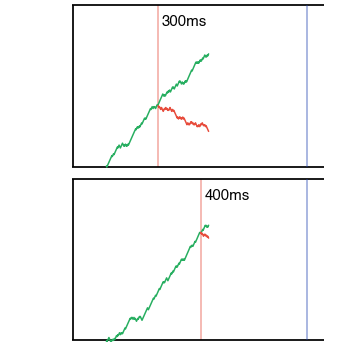
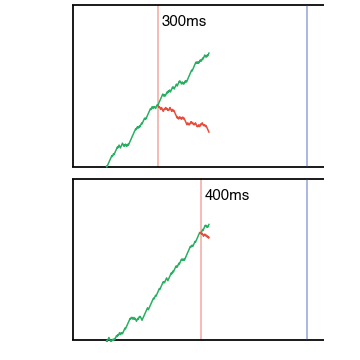
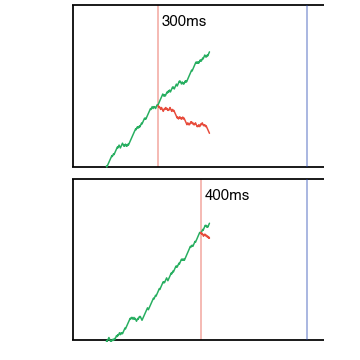
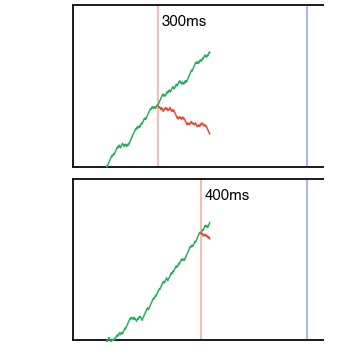
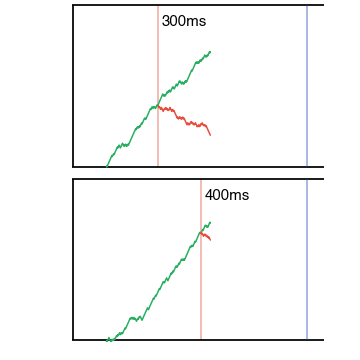
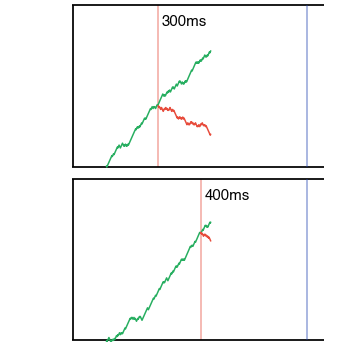
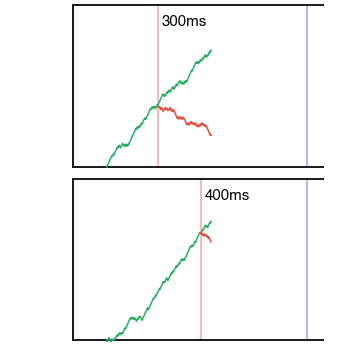
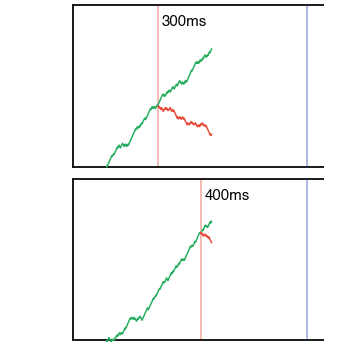
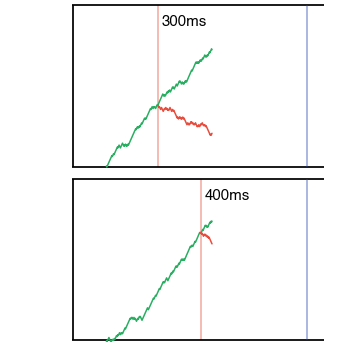
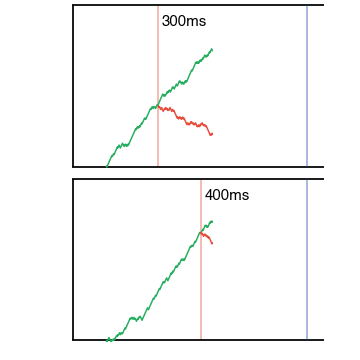
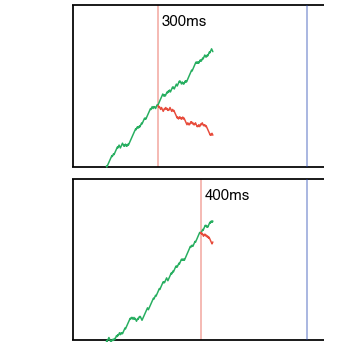
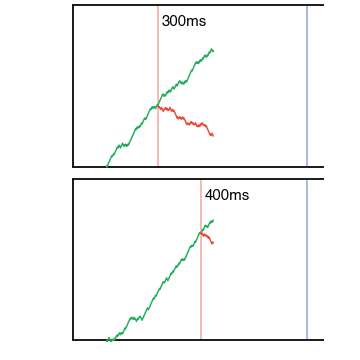
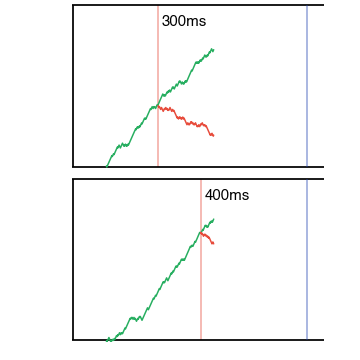
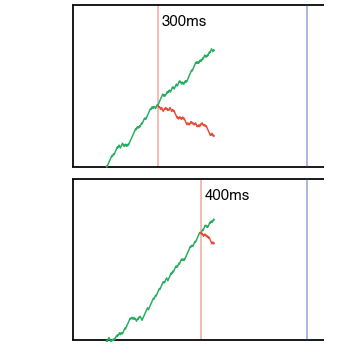
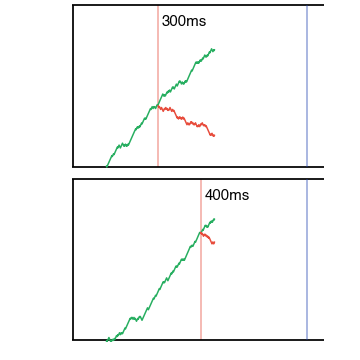
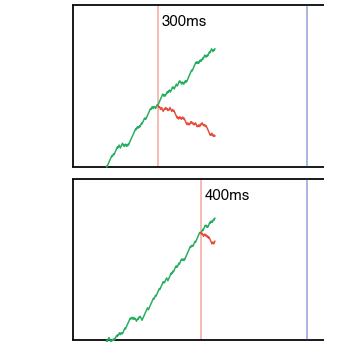
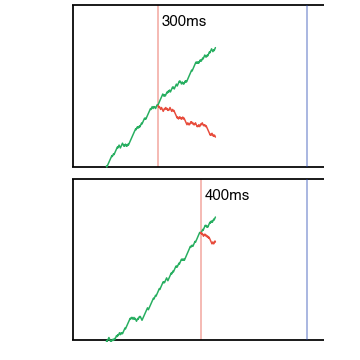
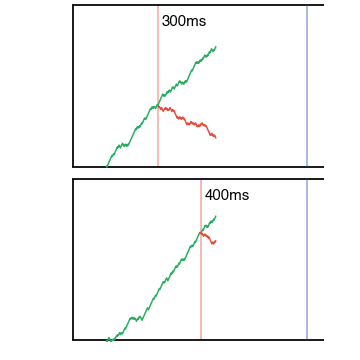
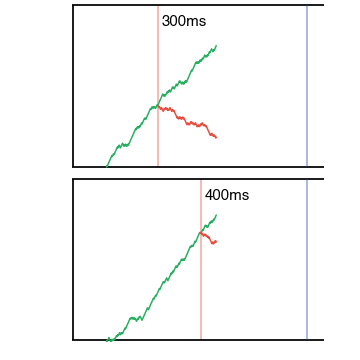
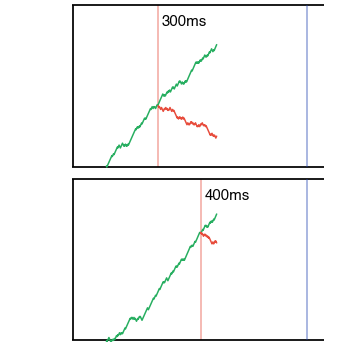
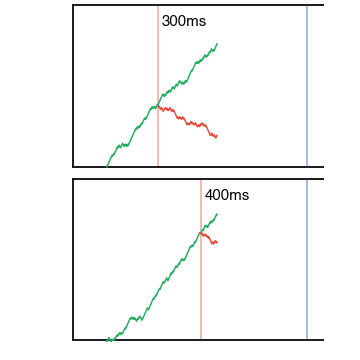
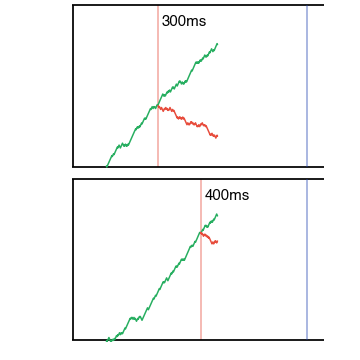
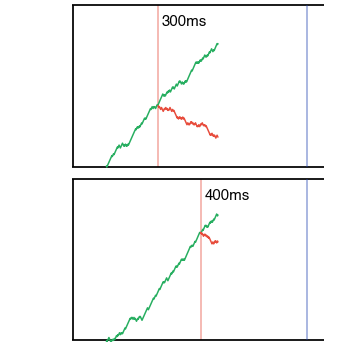
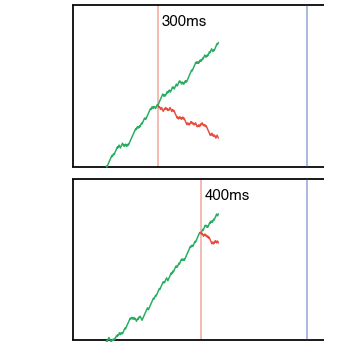
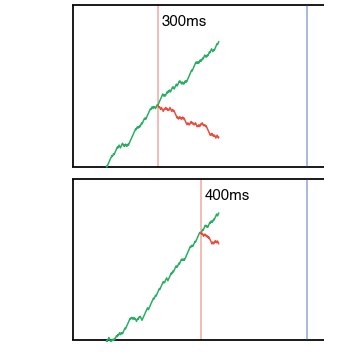
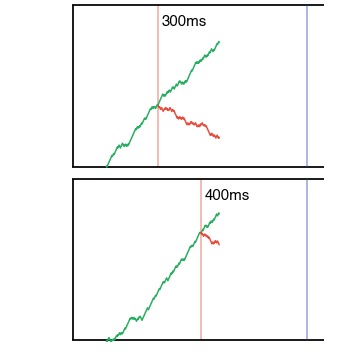
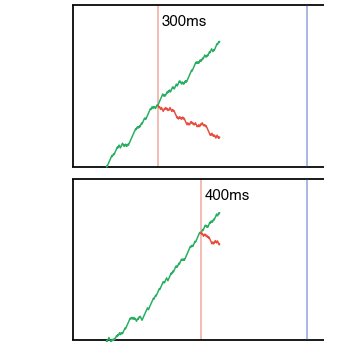
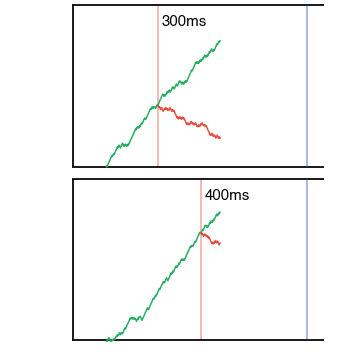
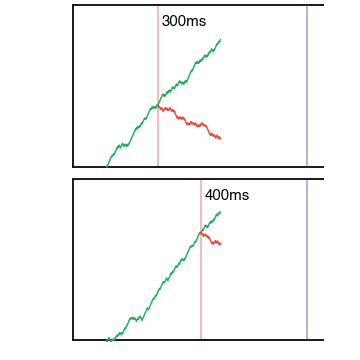
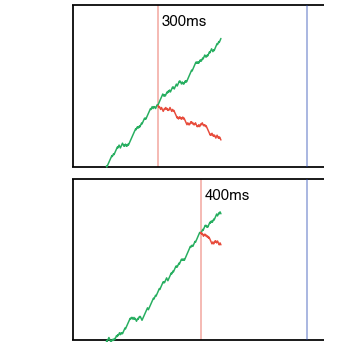
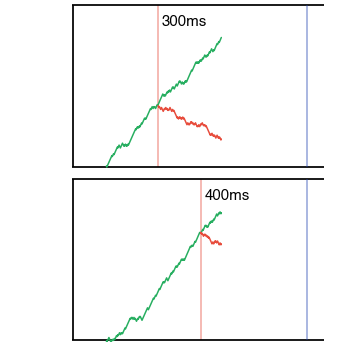
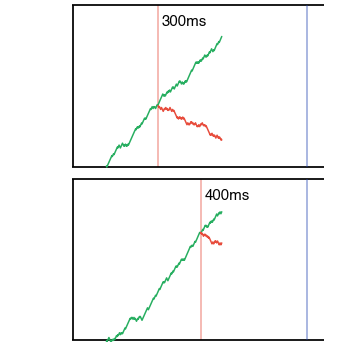
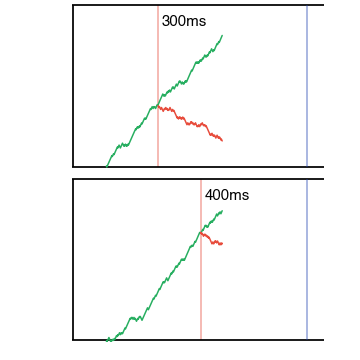
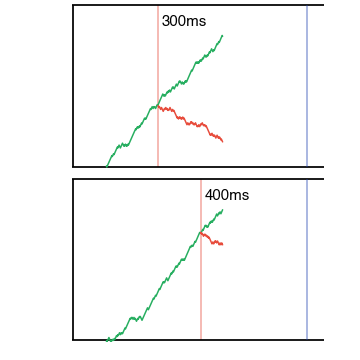
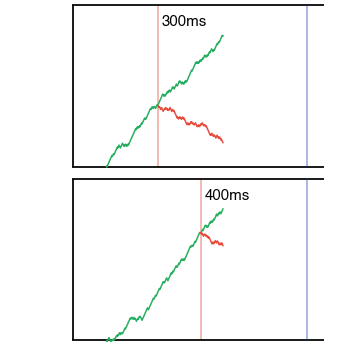
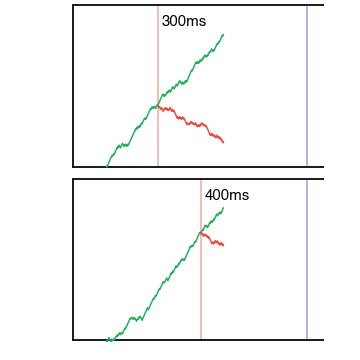
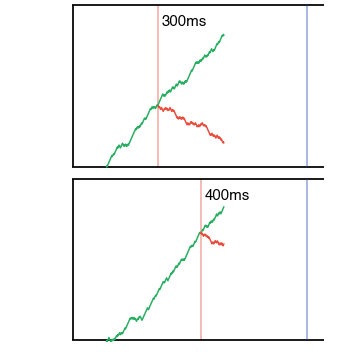
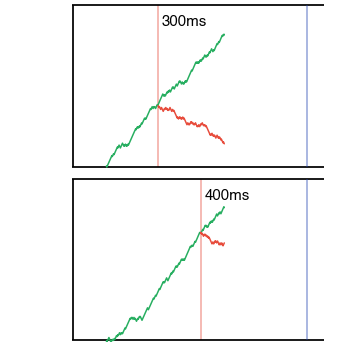
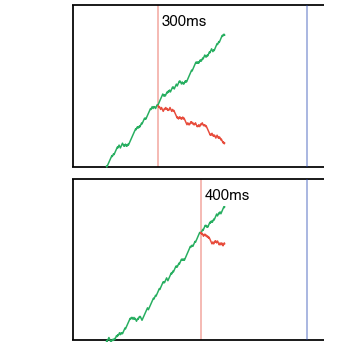
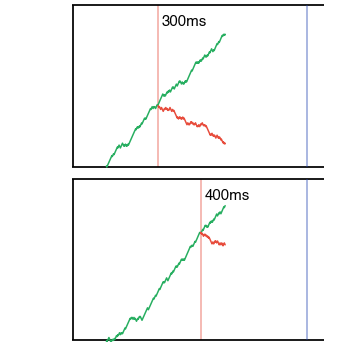
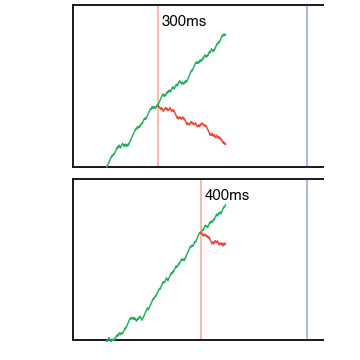
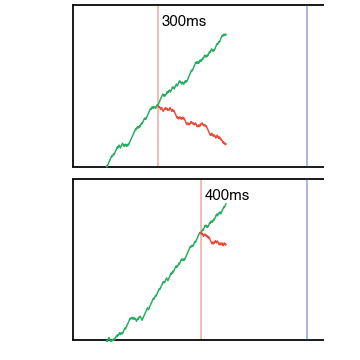
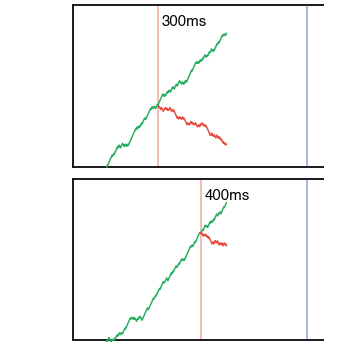
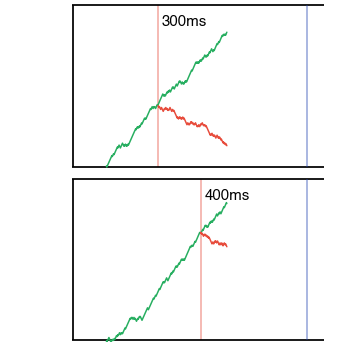
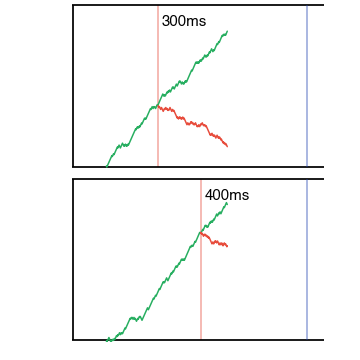
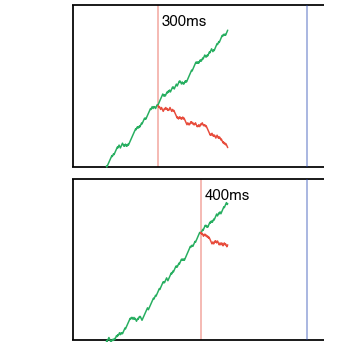
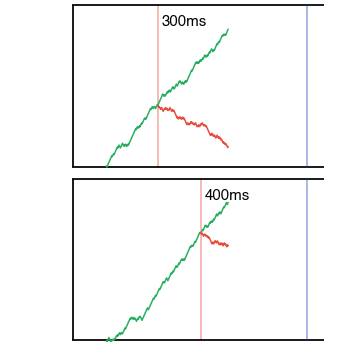
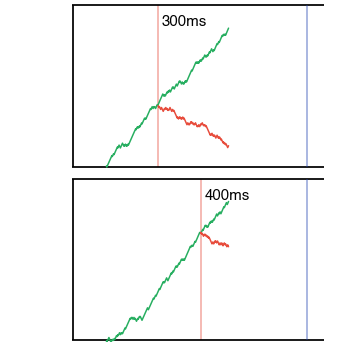
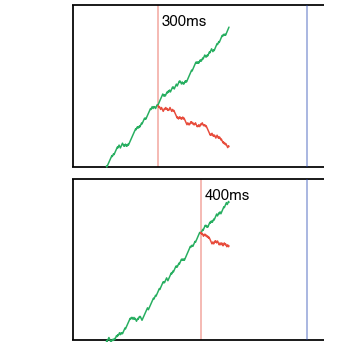
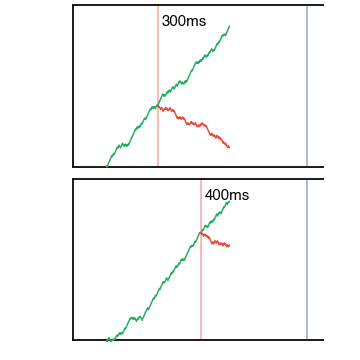
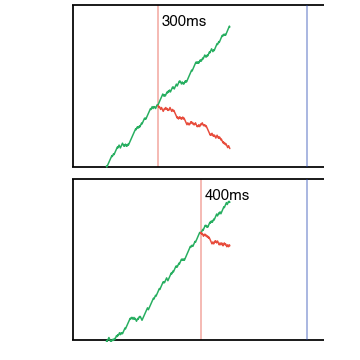
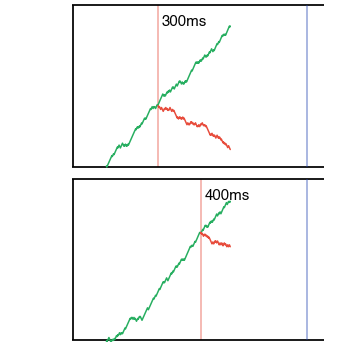
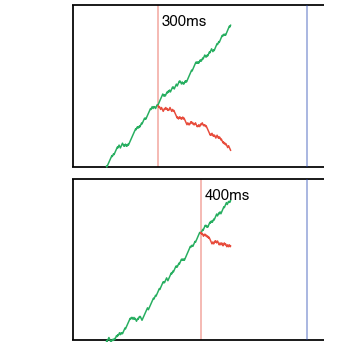
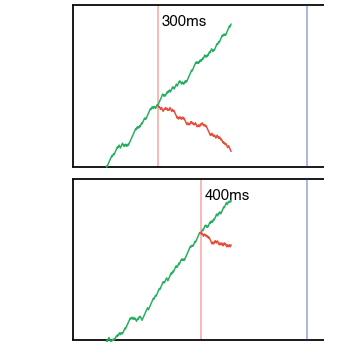
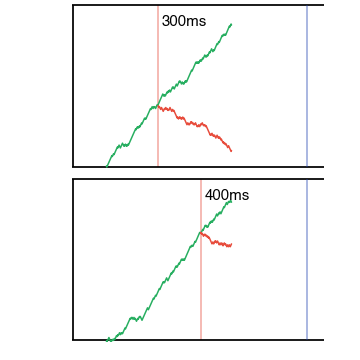
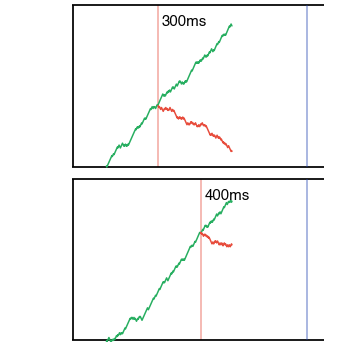
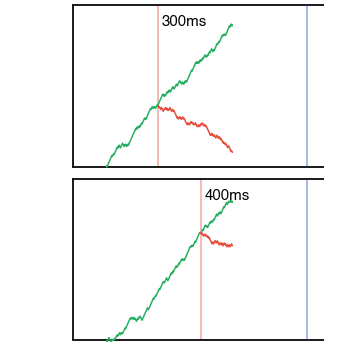
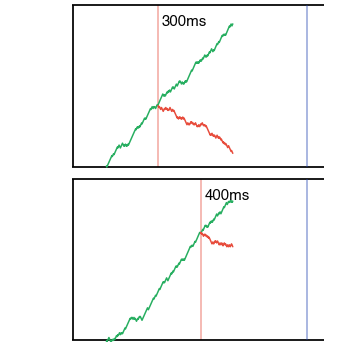
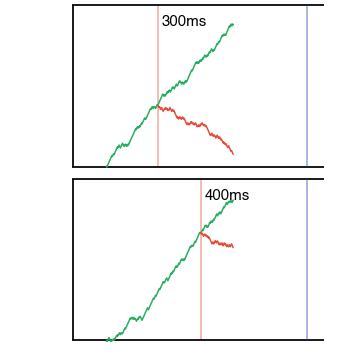
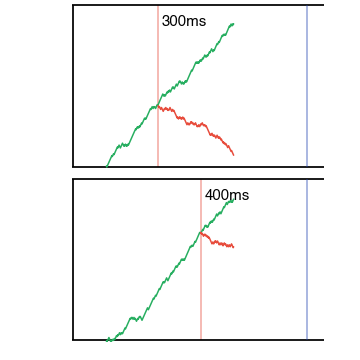
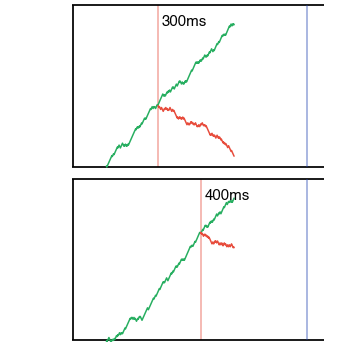
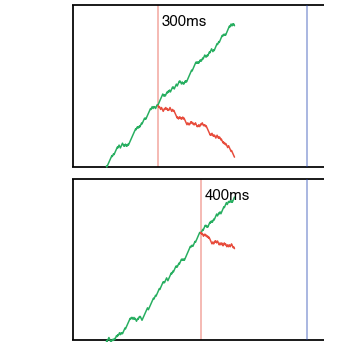
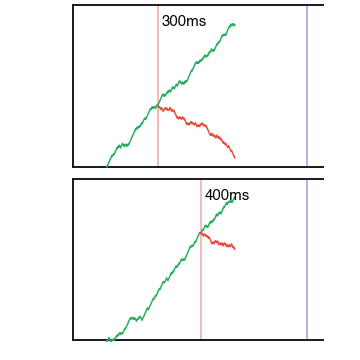
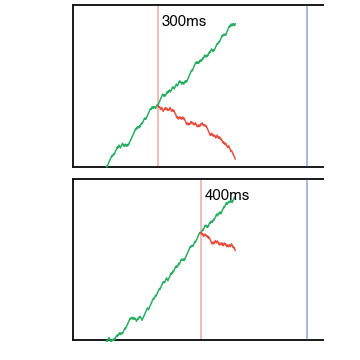
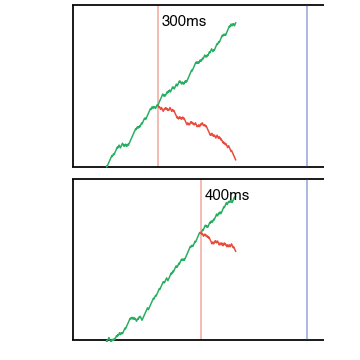
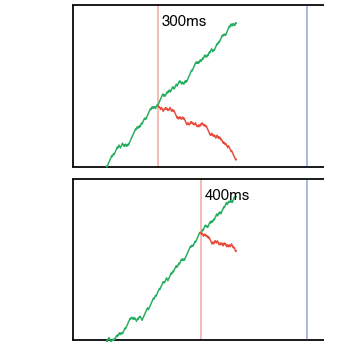
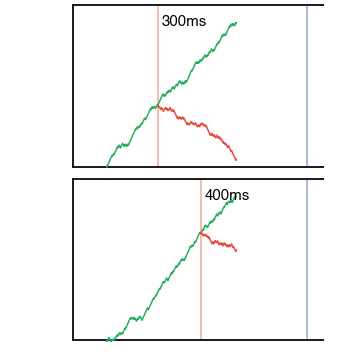
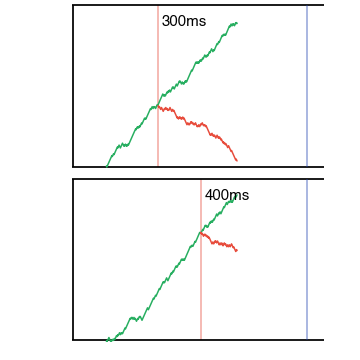
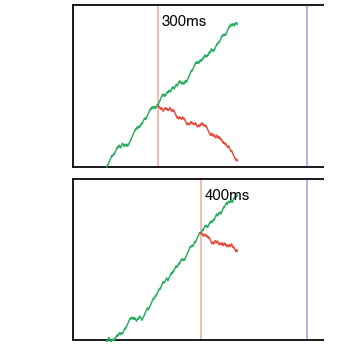
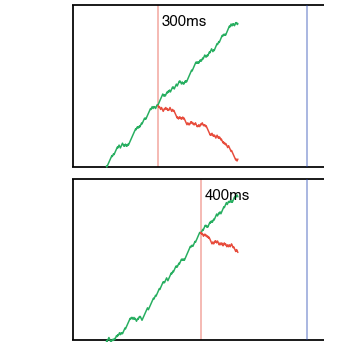
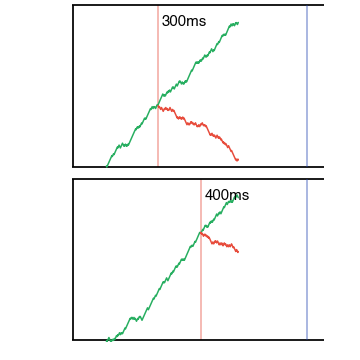
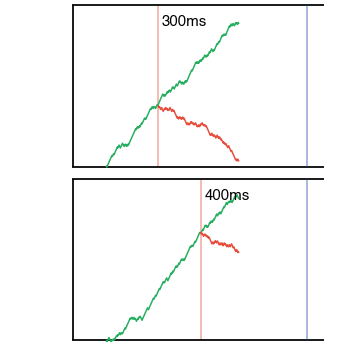
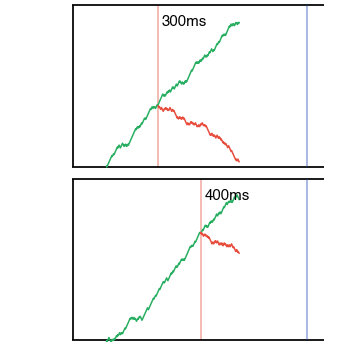
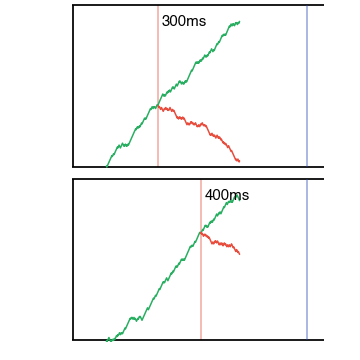
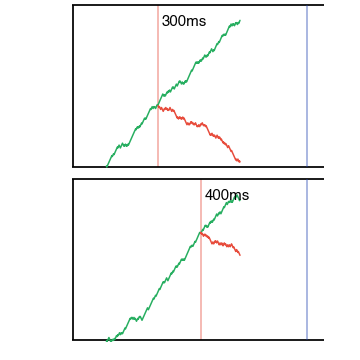
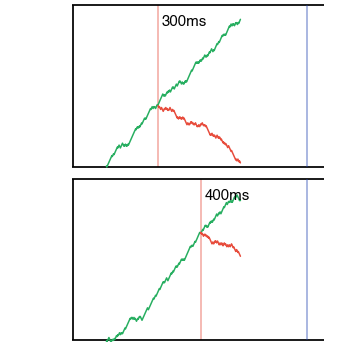
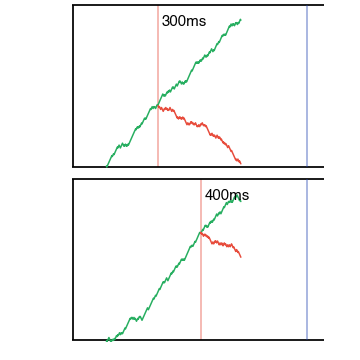
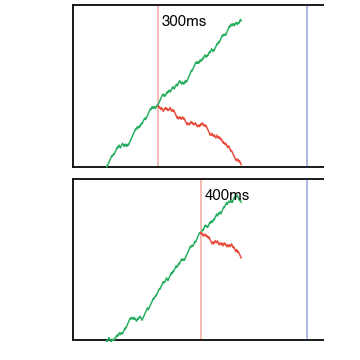
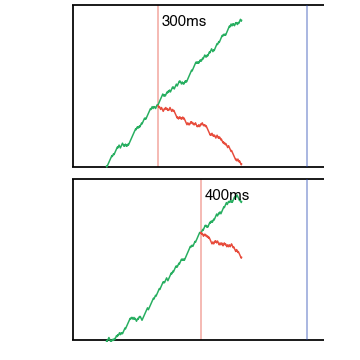
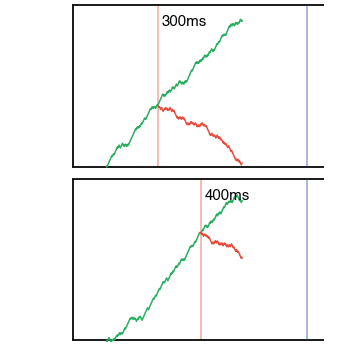
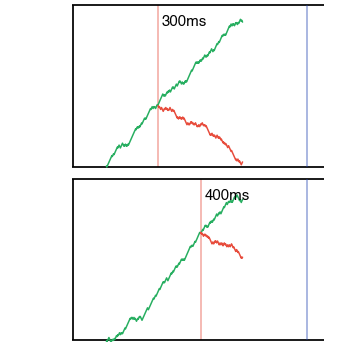
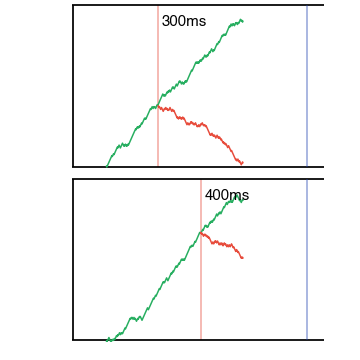
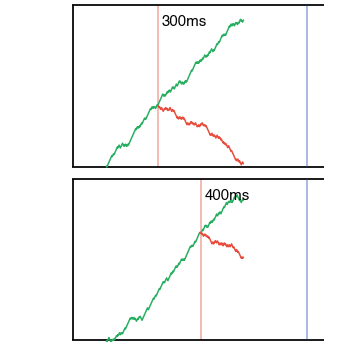
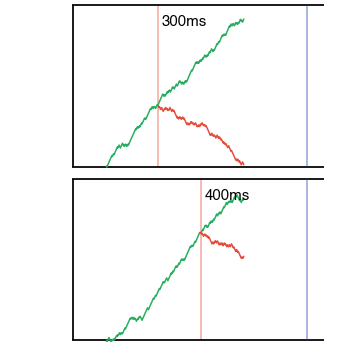
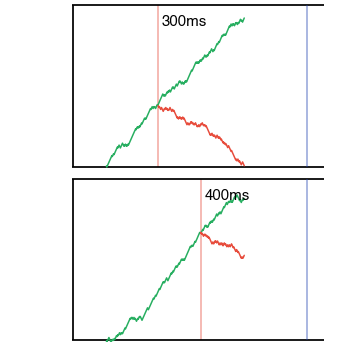
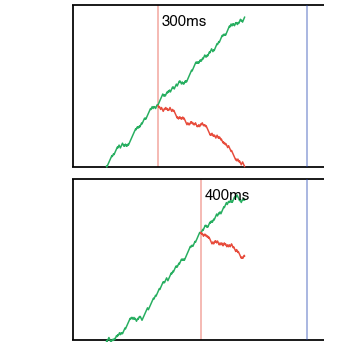
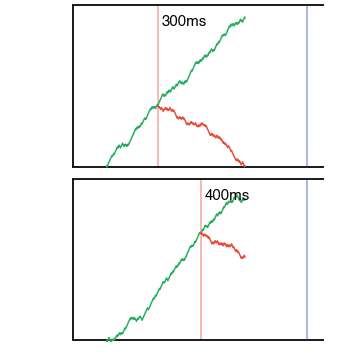
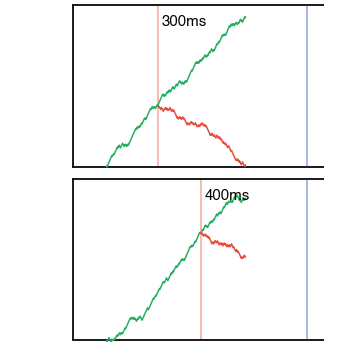
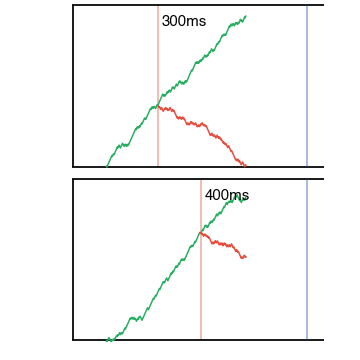
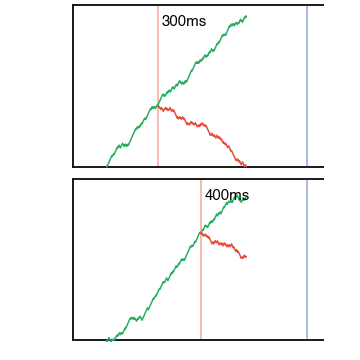
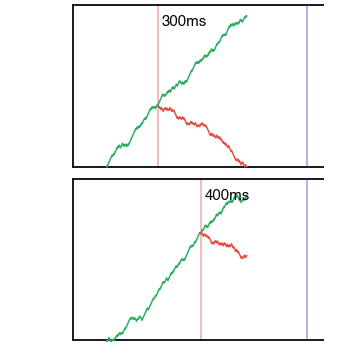
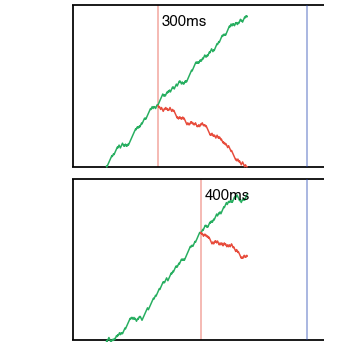
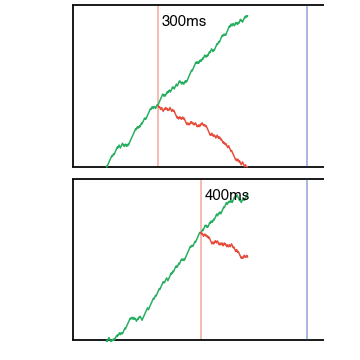
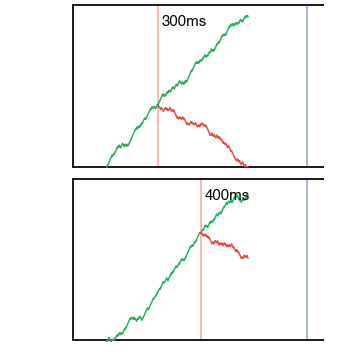
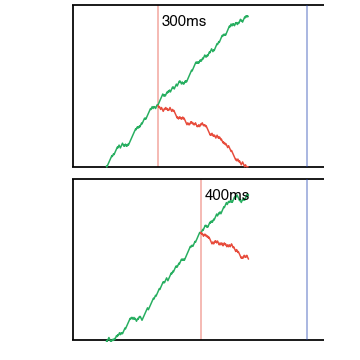
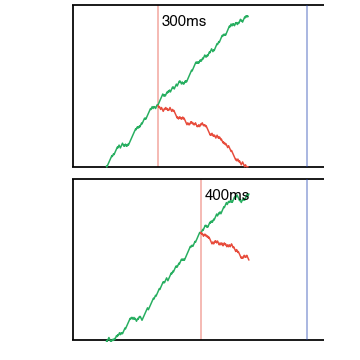
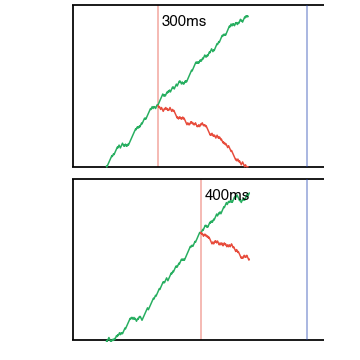
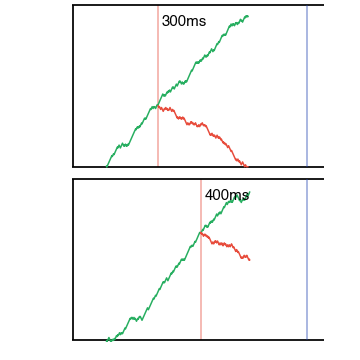
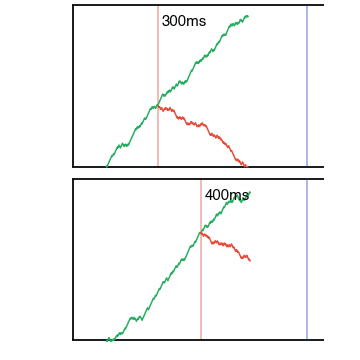
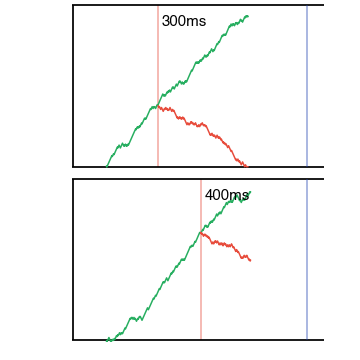
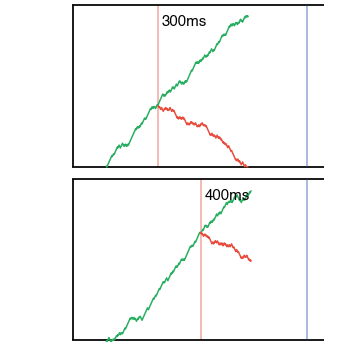
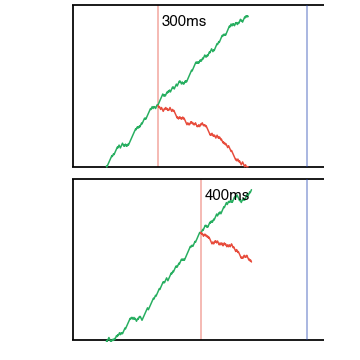
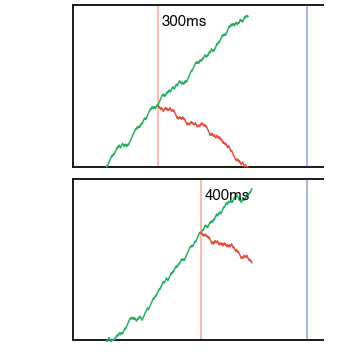
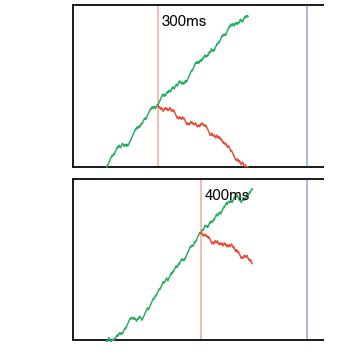
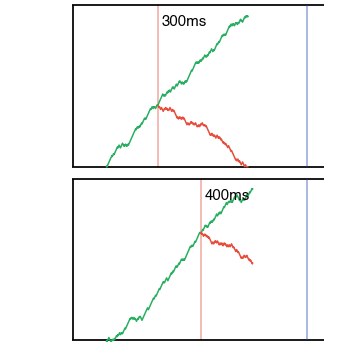
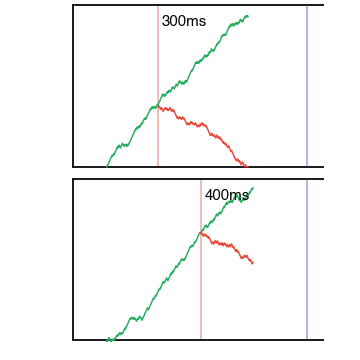
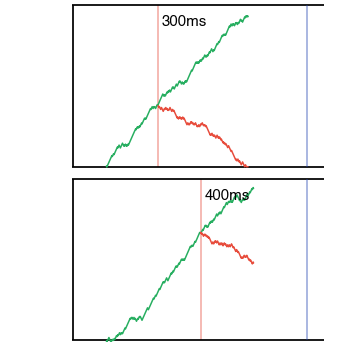
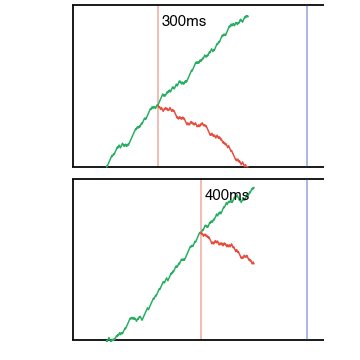
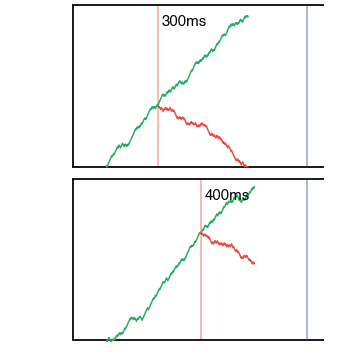
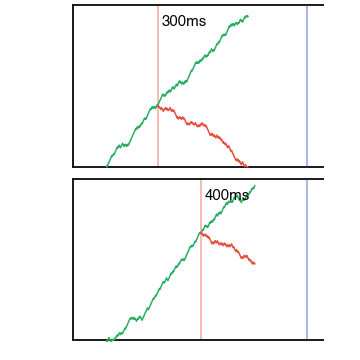
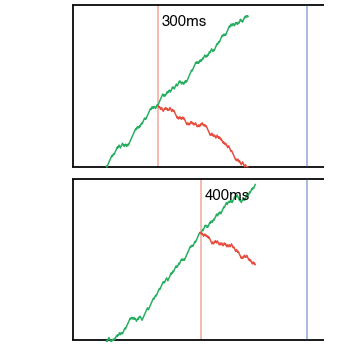
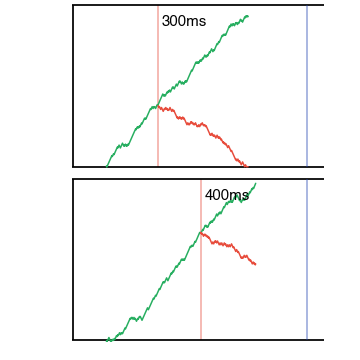
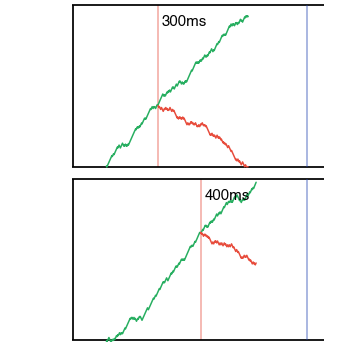
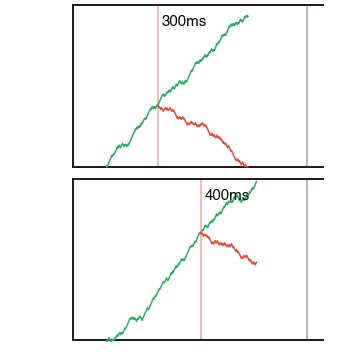
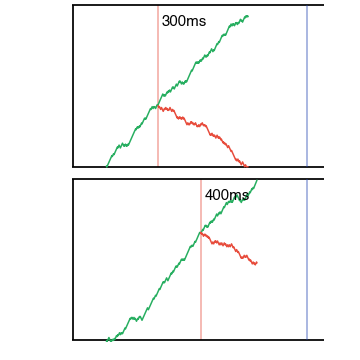
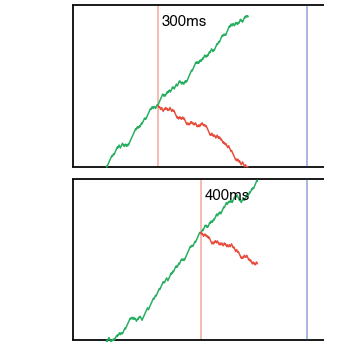
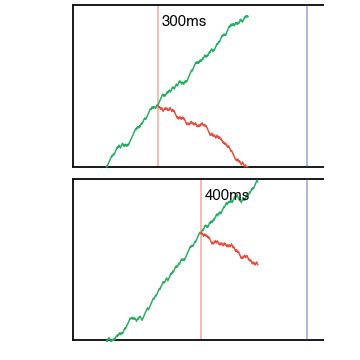
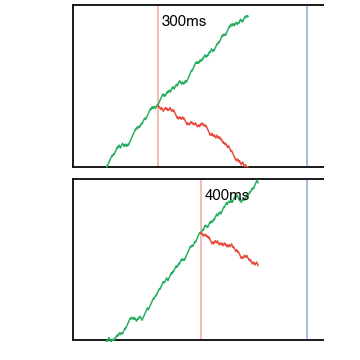
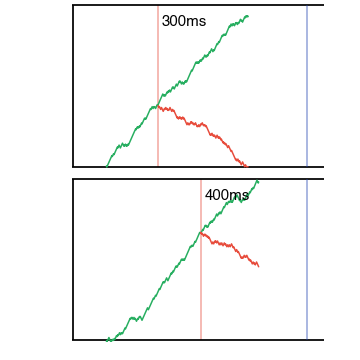
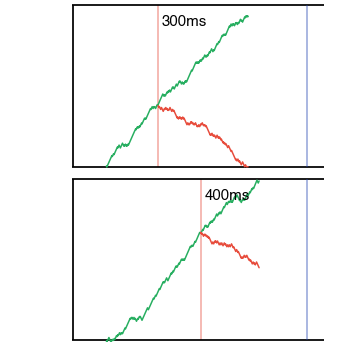
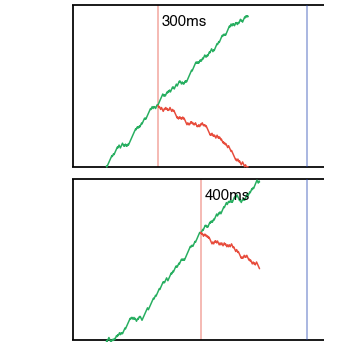
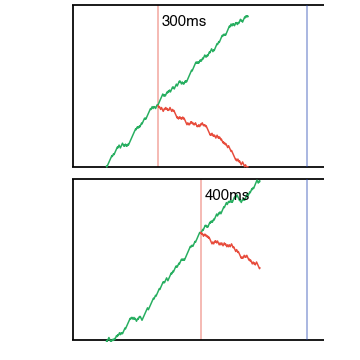
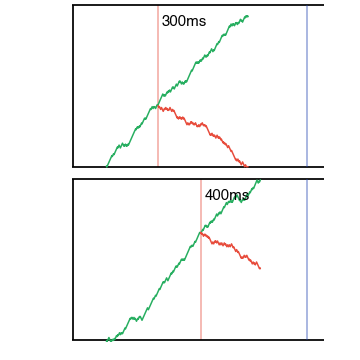
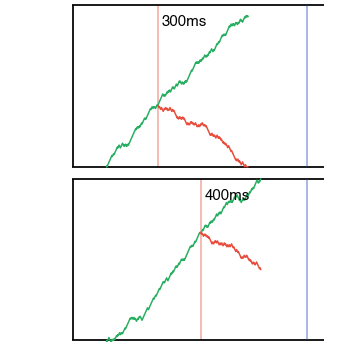

In [65]:
# Kindly ignore all of this nonsense 
x, gtraces, straces, xi, yi, nframes = vis.gen_re_traces(m, params)
f, axes = vis.build_decision_axis(onset=x[0][0], bound=bound, ssd=m.data.ssd.unique())

glines = [axes[i].plot([], [], linewidth=1.5)[0] for i, n in enumerate(gtraces)]
slines = [axes[i].plot([xi[i]], [yi[i]], linewidth=1.5)[0] for i, n in enumerate(straces)]

# Choice/RT dependency on SSD and variability in execution process
# red vertical line shows the SSD, blue dotted line shows the trial deadline (ie. time boundary)
anim = animation.FuncAnimation(f, vis.re_animate_multiax, fargs=(x, gtraces, glines, straces, slines, params, xi, yi), frames=nframes, interval=10, blit=True)
#anim.save('dpm_anim.mp4', dpi=300, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
anim
# call our new function to display the animation 
#display_animation(anim)
#anim.save('animation.mp4');

#animation.Animation._repr_html_ = anim_to_html

In [67]:
anim.save('ersdfgjiof.mp4', dpi=300, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])

In [18]:
images=[]
for image in glob.glob('*.png'):
      temp=imread(image)
      #temp = PIL_Image.open(image)
      keep = temp.copy()
      images.append(keep)
      #KEEP_NAMES.append(filename)
      temp.close()

NameError: name 'imread' is not defined

In [66]:
anim.save('asdfasdf.mp4', codec='libx264', dpi=300)

## view of model's "observed" dataframe

* **idx**: subject ID
* **Cond**: Baseline(bsl)/Caution(pnl) 
* **Go**: probability of a 'go' response on Go trials
* **200 - 400**: SSD conditions (in ms)
* **c10 - c90**: 10th - 90th RT quantiles for correct responses
* **e10 - e90**: 10th - 90th RT quantiles for error responses

In [6]:
m.observed.head()

idx Cond      Go  200  250   300   350   400     c10     c30     c50  \
0   28  bsl  0.9917    1    1  0.95  0.60  0.00  0.5051  0.5319  0.5581   
1   28  pnl  0.9752    1    1  0.95  0.80  0.10  0.5177  0.5452  0.5718   
2   29  bsl  0.9917    1    1  1.00  0.90  0.00  0.5250  0.5451  0.5585   
3   29  pnl  0.9669    1    1  1.00  0.75  0.35  0.5314  0.5600  0.5850   
4   30  bsl  0.9421    1    1  1.00  0.80  0.25  0.5298  0.5719  0.5981   

      c70     c90     e10     e30     e50     e70     e90  
0  0.5664  0.5982  0.4961  0.5317  0.5319  0.5458  0.5674  
1  0.5974  0.6119  0.5198  0.5452  0.5586  0.5718  0.6021  
2  0.5720  0.5984  0.5268  0.5451  0.5585  0.5709  0.5902  
3  0.5985  0.6250  0.5314  0.5448  0.5517  0.5751  0.5980  
4  0.6118  0.6384  0.5361  0.5606  0.5854  0.6098  0.6208

### Optimize DPM to the mean data (10 subjects; drift-rate free between Baseline/Caution) 

In [633]:
# set liberal opt. criteria for demo purposes
# multiopt to True in order to perform global
# optimization using basinhopping algorithm 
# (starting from two randomly sampled initial
# parameter sets)

m.optimize(maxfev=500, tol=1.e-2, multiopt=True, nrand_inits=2)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 19
         Function evaluations: 32


In [634]:
m.fitinfo

a           0.53865
chi       0.0032757
cnvrg          True
ndata            32
nfev             32
nvary             2
ssv         -1.1063
tr          0.17278
v_bsl        1.2987
v_pnl        1.2506
xb           0.9048
df               30
rchi     0.00010919
logp        -291.92
AIC         -287.92
BIC         -287.76
dtype: object

### Examine fits

In [ ]:
# fitting a model automatically saves a .txt
# summary of the fit results to the working dir
# (see xdpm_v_fit_report.txt)

# the fit summary (goodness of fit measures, etc.) 
# is also available in fitinfo attribute 
m.fitinfo
#best-fit parameter estimates (popt attribute)
m.popt
# model's behavioral predictions (fits attribute)
m.fits

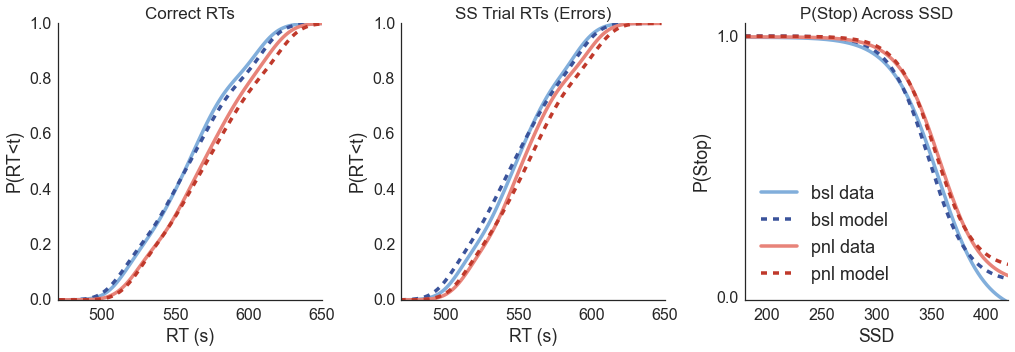

In [639]:
sns.set(style='white')
vis.plot_reactive_fits(m)

# Proactive (coming soon...)

In [2]:
# read in dataframe from demo dir (10 example subjects)
#prodat=pd.read_csv(pth+'proactive_example_idx.csv')
# Go trial probability conditions in 'pGo' column
pro.head()

idx  pGo Cond  response choice      rt  HL
0   28    1  bsl         1     go  0.4798   1
1   28    1  bsl         1     go  0.3716   1
2   28    1  bsl         1     go  0.5050   1
3   28    1  bsl         1     go  0.5183   1
4   28    1  bsl         1     go  0.4917   1

In [21]:
m = build.Model(kind='xpro', data=pro, depends_on={'v':'pGo'})
#m.optimize(maxfev=500, tol=1.e-2, multiopt=True)